In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=3)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
data.head(10)

,PeriodVFP,Outlet mnemonic,Cell Name,Electronic,Region,Channel,Category name,Manufacturer name,Brand name,Product name,XFactor,Raw Sales Volume,Extrapolated Sales Volume
0,361,ZD8020,CENTRAL UPPER EGYPT-R-LARGE GROCERY,False,UPPER EGYPT,Large Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,186.6969,13.7750,2571.749798
1,361,ASQ005,FATHALLAH ASWAQ,True,ALEXANDRIA,Supermarket/Key Account,CHEESE- BLOCK,HALAYEB CO,HALAYEB,HALAYEB TALAGA 400G TUB,1.0000,2.6160,2.616000
2,361,QNR089,SOUTHERN UE R SMALL GROCERY,False,UPPER EGYPT,Small Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,212.0554,2.9500,625.563430
3,361,KHZ049,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 250G CRT,1.0000,3.8125,3.812500
4,361,LX4700,South Upper Egypt Supermarket,False,UPPER EGYPT,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,10.9699,2.0350,22.323747
5,361,RAG052,RAGAB SONS,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,THE ARAB DAIRY PRODUCTS CO.,PANDA,PANDA WHITE CHEESE OLIVE 250GR CRT,1.0000,0.2725,0.272500
6,361,KHZ052,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,DOMTY - ARABIAN FOOD INDUSTRIES CO,DOMTY,DOMTY FETA 250G CRT,1.0000,1.9075,1.907500
7,361,RAG027,RAGAB SONS,True,DELTA,Supermarket/Key Account,CHEESE- BLOCK,THE ARAB DAIRY PRODUCTS CO.,PANDA,PANDA FETA LIGHT 500G CRT,1.0000,28.3200,28.320000
8,361,RAG041,RAGAB SONS,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,1.0000,29.4100,29.410000
9,361,KHZ032,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,GREEN LAND,GREEN LAND BARAMILY 450G TUB,1.0000,2.9430,2.943000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994749 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  994749 non-null  int64  
 1   Outlet mnemonic            994749 non-null  object 
 2   Cell Name                  994749 non-null  object 
 3   Electronic                 994749 non-null  bool   
 4   Region                     994749 non-null  object 
 5   Channel                    994749 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    994749 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  994749 non-null  float64
dtypes: bool(1), float64(3), int64

In [ ]:
data.describe()

,PeriodVFP,XFactor,Raw Sales Volume,Extrapolated Sales Volume
count,994749.000000,994749.000000,983173.000000,994749.000000
mean,372.193752,44.236991,17.598466,409.503943
std,6.946373,107.284482,72.831053,1882.436078
min,361.000000,0.733100,0.000000,0.000000
25%,366.000000,1.000000,1.305000,1.635000
50%,372.000000,1.000000,4.830000,7.897500
75%,378.000000,3.316400,14.160000,54.470000
max,384.000000,1383.278000,13577.720000,150142.583232


In [ ]:
def columns_info(data):
  cols = []
  dtypes = []
  unique = []
  n_unique = []

  for col in data.columns:
    cols.append(col)
    dtypes.append(data[col].dtype)
    unique.append(data[col].unique())
    n_unique.append(data[col].nunique())

  return pd.DataFrame({'names': cols, 'types': dtypes, 'unique':unique, 'n_unique':n_unique})

In [ ]:
columns_info(data)

,names,types,unique,n_unique
0,PeriodVFP,int64,"[361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384]",24
1,Outlet mnemonic,object,"[ZD8020, ASQ005, QNR089, KHZ049, LX4700, RAG052, KHZ052, RAG027, RAG041, KHZ032, MO3200, RAG014, XX0074, KHZ039, ASQ007, MO2300, MO5900, KAL095, RAG046, RAG003, XX0043, ASQ009, QU1250, WKL007, MO2500, SPY003, SPY005, CRF010, CRF005, SQR047, CAR133, C01973, KHZ001, MO1400, SG0051, XX0061, ZS3600, XX0075, FTL001, C02126, AST155, DES012, RAG020, MMO009, RAG045, RAG060, SQR028, CRF037, MO3800, KHZ016, MO5200, MO0100, C02876, FYR096, FFM002, QU1270, KLR011, A00233, C02755, RAY001, BS1120, SPY007, DSR010, CRF023, CRF012, CRF031, XX0049, XX0071, CRF011, CRF001, RAY005, CRF016, SPY008, XX0069, RAY007, MO1600, RAG023, XX0076, KHZ037, KHZ027, RAG048, SPY011, KAL127, ASQ003, C01951, XX0073, MO1000, RAG001, C02927, RAG078, KHZ044, KHZ042, ASQ006, ASQ004, SG0175, ASQ016, CRF015, RAG039, C02910, CA4600, ...]",2235
2,Cell Name,object,"[CENTRAL UPPER EGYPT-R-LARGE GROCERY, FATHALLAH ASWAQ, SOUTHERN UE R SMALL GROCERY, KHEIR ZAMAN, South Upper Egypt Supermarket, RAGAB SONS, METRO, East Delta Urban Kazyoun, East Cairo large groceries, East Cairo Seoudi, SOUTHERN UPPER EGYPT-U-LARGE GROCERY, ELWEKALA, SPINNEYS, CAREFOUR, EAST DELTA-R-OUTLET WITHIN RESIDENCE, East Cairo kiosks, West Cairo small groceries, CENTRAL UPPER EGYPT-R-OUTLET WITHIN RESI, FATHALLAH GOMLA, West Cairo large groceries, CENTRAL UPPER EGYPT-U-LARGE GROCERY, WEST DELTA-U-KA/SUPERMARKET, MINI METRO, CENTRAL UE R MEDIUM GROCERY, FRESH FOOD, EAST DELTA R SMALL GROCERY, ALEXANDRIA-U-SMALL GROCERY, RAYA, CENTRAL UE U MEDIUM GROCERY, WEST DELTA R SMALL GROCERY, East Cairo Mahalawy, West Cairo Kazyoun, East Cairo Kazyoun, EAST DELTA U SMALL/OWR, East cairo supermarkets, West Cairo supermarkets, SOUTHERN UE U OWR, EAST DELTA-R-KIOSKS, West Cairo Seoudi, LULU Market, EAST DELTA-U-LARGE GROCERY, WEST DELTA U SMALL/OWR, ZAHRAN, ALEXANDRIA-U-LARGE GROCERY, CENTRAL UPPER EGYPT-R-KIOSKS, ALEXANDRIA-U-KAZYON, WEST DELTA-R-OUTLET WITHIN RESIDENCE, CANAL ZONE-U-KAZYON, EAST DELTA U MEDIUM GROCERY, EAST DELTA-U-KA/SUPERMARKET, SOUTHERN UE R MEDIUM GROCERY, SOUTHERN UPPER EGYPT-R-LARGE GROCERY, CANAL ZONE-U-LARGE GROCERY, West Delta urban Kazyoun, CENTRAL UE R SMALL GROCERY, East Cairo Medium groceries, East Cairo small groceries, Central upper Egypt urban Kazyoun, ALEXANDRIA-U-MEDIUM GROCERY, CANAL ZONE R MEDIUM GROCERY, EAST DELTA-U-KIOSKS, EAST DELTA-R-MEKLA (ROASTERIES), EAST DELTA-U-HABERDASHERIES, CANAL ZONE-U-HABERDASHERIES, CANAL ZONE RURAL OKS/OHB/MEK, ALEXANDRIA-U-KIOSKS, WEST DELTA R MEDIUM GROCERY, MERCATO, West Cairo Mekla, WEST DELTA-U-MEKLA (ROASTERIES), East cairo Mekla, SOUTHERN UPPER EGYPT-U-MEKLA (ROASTERIES, CENTRAL UE U OWR, WEST DELTA-U-HABERDASHERIES, CENTRAL UE U SMALL GROCERY, CANAL ZONE U MEDIUM GROCERY, West Cairo kiosks, WEST DELTA-R-LARGE GROCERY, CENTRAL UPPER EGYPT-R-HABERDASHERIES, CANAL ZONE-U-KIOSKS, WEST DELTA-R-KIOSKS, SOUTHERN UE U SMALL GROCERY, SOUTHERN UPPER EGYPT-R-KIOSKS, West CAIRO-U-HABERDASHERIES, EAST DELTA-U-MEKLA (ROASTERIES), East CAIRO-U-HABERDASHERIES, WEST DELTA-R-MEKLA (ROASTERIES), CENTRAL UPPER EGYPT-U-MEKLA (ROASTERIES), SOUTHERN UPPER EGYPT-U-HABERDASHERIES, CENTRAL UPPER EGYPT-R-MEKLA (ROASTERIES), ALEXANDRIA-U-HABERDASHERIES, CANAL ZONE-R-LARGE GROCERY, East Cairo outlet within residence, SOUTHERN UPPER EGYPT-U-KIOSKS, HYPERONE, EAST DELTA R MEDIUM GROCERY, WEST DELTA-U-LARGE GROCERY, ALEXANDRIA-U-KA/SUPERMARKET, ALEXANDRIA-U-MEKLA (ROASTERIES), CANAL ZONE-U-KA/SUPERMARKET, ...]",119
3,Electronic,bool,"[False, True]",2
4,Region,object,"[UPPER EGYPT , ALEXANDRIA, CAIRO , DELTA , CANAL ZONE ]",5
5,Channel,object,"[Large Grocery, Supermarket/Key Account, Small Grocery, Haberdashery/Kiosk/Mekla]",4
6,Category name,object,"[CHEESE- BLOCK , CHEESE (BLOCKS SOLD BY WEIGHT) , nan, CHEESE- COTTAGE ]",3
7,Manufacturer name,object,"[OBOUR LAND CO, HALAYEB

In [ ]:
description = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=1)
description

,PeriodVFP,"24 Months from Jan'20 to Dec'21. i.e ""361""= Jan'20, ""384""=Dec'21",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Outlet mnemonic,Unique code identifying a store,NaN,NaN,PeriodVFP,Month/Year
1,Cell Name,Cross between the region and channel to uniquely identify the location of the store,NaN,NaN,361,2018-10-01 00:00:00
2,Electronic,Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team,NaN,NaN,362,2018-11-01 00:00:00
3,Region,The region reporting for the store,NaN,NaN,363,2018-12-01 00:00:00
4,Channel,The channel reporting for the store,NaN,NaN,364,2019-01-01 00:00:00
5,Category name,"Split within White Cheese category for similar SKUs (block, block by weight, cottage cheese)",NaN,NaN,365,2019-02-01 00:00:00
6,Manufacturer name,Company owner of the SKU (example: DOMTY - ARABIAN FOOD INDUSTRIES CO),NaN,NaN,366,2019-03-01 00:00:00
7,Brand name,"Product identity within a company. A company can have multiple brands (example: Domty, Domty Plus, Gebnaty are brands of DOMTY - ARABIAN FOOD INDUSTRIES CO)",NaN,NaN,367,2019-04-01 00:00:00
8,Product name,A unique identifier of each product (example: DOMTY PLUS FETA 250G CRT),NaN,NaN,368,2019-05-01 00:00:00
9,XFactor,"The factor representing the number of similar stores in the universe (for example, XFactor = 2 means that there are 10 similar stores in the universe)",NaN,NaN,369,2019-06-01 00:00:00


In [ ]:
data.nunique()

,0
PeriodVFP,24
Outlet mnemonic,2235
Cell Name,119
Electronic,2
Region,5
Channel,4
Category name,3
Manufacturer name,712
Brand name,815
Product name,1749


In [ ]:
data['Channel'].value_counts()

,count
Channel,
Supermarket/Key Account,812525
Small Grocery,97446
Large Grocery,66497
Haberdashery/Kiosk/Mekla,18281


In [ ]:
data['Category name'].value_counts()

,count
Category name,
CHEESE- BLOCK,960832
CHEESE (BLOCKS SOLD BY WEIGHT),15413
CHEESE- COTTAGE,6928


In [ ]:
data['Electronic'].value_counts()

,count
Electronic,
True,786690
False,208059


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
PeriodVFP,0
Outlet mnemonic,0
Cell Name,0
Electronic,0
Region,0
Channel,0
Category name,11576
Manufacturer name,11576
Brand name,11576
Product name,11576


In [ ]:
(data.isnull().sum() / len(data) * 100).round(2)

,0
PeriodVFP,0.00
Outlet mnemonic,0.00
Cell Name,0.00
Electronic,0.00
Region,0.00
Channel,0.00
Category name,1.16
Manufacturer name,1.16
Brand name,1.16
Product name,1.16


In [ ]:
missing_data_rows = data[data[['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume']].isnull().any(axis=1)]
len(missing_data_rows)

11576

*   This indicates that the rows with missing values are the same across these columns.
*   The Raw Sales Volume and Extrapolated Sales Volume columns are also missing values, which are critical for any sales analysis.
*   So, It would not be efficient or useful to attempt to fill these rows.



In [ ]:
missing_data_rows.head()

,PeriodVFP,Outlet mnemonic,Cell Name,Electronic,Region,Channel,Category name,Manufacturer name,Brand name,Product name,XFactor,Raw Sales Volume,Extrapolated Sales Volume
306,361,DMT035,EAST DELTA-U-KIOSKS,False,DELTA,Haberdashery/Kiosk/Mekla,NaN,NaN,NaN,NaN,75.1340,NaN,0.0
307,361,KAR046,EAST DELTA-R-MEKLA (ROASTERIES),False,DELTA,Haberdashery/Kiosk/Mekla,NaN,NaN,NaN,NaN,188.7477,NaN,0.0
308,361,A00862,ALEXANDRIA-U-SMALL GROCERY,False,ALEXANDRIA,Small Grocery,NaN,NaN,NaN,NaN,201.3802,NaN,0.0
309,361,DMT049,EAST DELTA-U-HABERDASHERIES,False,DELTA,Haberdashery/Kiosk/Mekla,NaN,NaN,NaN,NaN,65.9773,NaN,0.0
310,361,IS1686,CANAL ZONE-U-HABERDASHERIES,False,CANAL ZONE,Haberdashery/Kiosk/Mekla,NaN,NaN,NaN,NaN,45.0099,NaN,0.0


In [ ]:
data.dropna(subset=['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume'], inplace=True)

In [ ]:
data.isnull().sum()

,0
PeriodVFP,0
Outlet mnemonic,0
Cell Name,0
Electronic,0
Region,0
Channel,0
Category name,0
Manufacturer name,0
Brand name,0
Product name,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983173 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  983173 non-null  int64  
 1   Outlet mnemonic            983173 non-null  object 
 2   Cell Name                  983173 non-null  object 
 3   Electronic                 983173 non-null  bool   
 4   Region                     983173 non-null  object 
 5   Channel                    983173 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    983173 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  983173 non-null  float64
dtypes: bool(1), float64(3), int64(1), 

In [ ]:
data['PeriodVFP'].nunique()

24

The dataset spans a total of 24 months, covering a period from January 2020 to December 2021. Each month is represented by a unique PeriodVFP code, which corresponds to a specific date.

In [ ]:
period_mapping = {
    361: '2020-01-01', 362: '2020-02-01', 363: '2020-03-01',
    364: '2020-04-01', 365: '2020-05-01', 366: '2020-06-01',
    367: '2020-07-01', 368: '2020-08-01', 369: '2020-09-01',
    370: '2020-10-01', 371: '2020-11-01', 372: '2020-12-01',
    373: '2021-01-01', 374: '2021-02-01', 375: '2021-03-01',
    376: '2021-04-01', 377: '2021-05-01', 378: '2021-06-01',
    379: '2021-07-01', 380: '2021-08-01', 381: '2021-09-01',
    382: '2021-10-01', 383: '2021-11-01', 384: '2021-12-01'
}

period_df = pd.DataFrame(list(period_mapping.items()), columns=['PeriodVFP', 'PeriodDate'])
period_df['PeriodDate'] = pd.to_datetime(period_df['PeriodDate']).dt.date

period_df

,PeriodVFP,PeriodDate
0,361,2020-01-01
1,362,2020-02-01
2,363,2020-03-01
3,364,2020-04-01
4,365,2020-05-01
5,366,2020-06-01
6,367,2020-07-01
7,368,2020-08-01
8,369,2020-09-01
9,370,2020-10-01


In [ ]:
data = pd.merge(data, period_df, on='PeriodVFP', how='left')
data.head()

,PeriodVFP,Outlet mnemonic,Cell Name,Electronic,Region,Channel,Category name,Manufacturer name,Brand name,Product name,XFactor,Raw Sales Volume,Extrapolated Sales Volume,PeriodDate
0,361,ZD8020,CENTRAL UPPER EGYPT-R-LARGE GROCERY,False,UPPER EGYPT,Large Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,186.6969,13.7750,2571.749798,2020-01-01
1,361,ASQ005,FATHALLAH ASWAQ,True,ALEXANDRIA,Supermarket/Key Account,CHEESE- BLOCK,HALAYEB CO,HALAYEB,HALAYEB TALAGA 400G TUB,1.0000,2.6160,2.616000,2020-01-01
2,361,QNR089,SOUTHERN UE R SMALL GROCERY,False,UPPER EGYPT,Small Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,212.0554,2.9500,625.563430,2020-01-01
3,361,KHZ049,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 250G CRT,1.0000,3.8125,3.812500,2020-01-01
4,361,LX4700,South Upper Egypt Supermarket,False,UPPER EGYPT,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,10.9699,2.0350,22.323747,2020-01-01


In [ ]:
data.drop(['PeriodVFP'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983173 entries, 0 to 983172
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Outlet mnemonic            983173 non-null  object 
 1   Cell Name                  983173 non-null  object 
 2   Electronic                 983173 non-null  bool   
 3   Region                     983173 non-null  object 
 4   Channel                    983173 non-null  object 
 5   Category name              983173 non-null  object 
 6   Manufacturer name          983173 non-null  object 
 7   Brand name                 983173 non-null  object 
 8   Product name               983173 non-null  object 
 9   XFactor                    983173 non-null  float64
 10  Raw Sales Volume           983173 non-null  float64
 11  Extrapolated Sales Volume  983173 non-null  float64
 12  PeriodDate                 983173 non-null  object 
dtypes: bool(1), float64(3), objec

In [ ]:
data.head(10)

,Outlet mnemonic,Cell Name,Electronic,Region,Channel,Category name,Manufacturer name,Brand name,Product name,XFactor,Raw Sales Volume,Extrapolated Sales Volume,PeriodDate
0,ZD8020,CENTRAL UPPER EGYPT-R-LARGE GROCERY,False,UPPER EGYPT,Large Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,186.6969,13.7750,2571.749798,2020-01-01
1,ASQ005,FATHALLAH ASWAQ,True,ALEXANDRIA,Supermarket/Key Account,CHEESE- BLOCK,HALAYEB CO,HALAYEB,HALAYEB TALAGA 400G TUB,1.0000,2.6160,2.616000,2020-01-01
2,QNR089,SOUTHERN UE R SMALL GROCERY,False,UPPER EGYPT,Small Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,212.0554,2.9500,625.563430,2020-01-01
3,KHZ049,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 250G CRT,1.0000,3.8125,3.812500,2020-01-01
4,LX4700,South Upper Egypt Supermarket,False,UPPER EGYPT,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,10.9699,2.0350,22.323747,2020-01-01
5,RAG052,RAGAB SONS,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,THE ARAB DAIRY PRODUCTS CO.,PANDA,PANDA WHITE CHEESE OLIVE 250GR CRT,1.0000,0.2725,0.272500,2020-01-01
6,KHZ052,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,DOMTY - ARABIAN FOOD INDUSTRIES CO,DOMTY,DOMTY FETA 250G CRT,1.0000,1.9075,1.907500,2020-01-01
7,RAG027,RAGAB SONS,True,DELTA,Supermarket/Key Account,CHEESE- BLOCK,THE ARAB DAIRY PRODUCTS CO.,PANDA,PANDA FETA LIGHT 500G CRT,1.0000,28.3200,28.320000,2020-01-01
8,RAG041,RAGAB SONS,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,1.0000,29.4100,29.410000,2020-01-01
9,KHZ032,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,GREEN LAND,GREEN LAND BARAMILY 450G TUB,1.0000,2.9430,2.943000,2020-01-01


To save a cleaned DataFrame from Google Colab to my local computer as an Excel file

In [ ]:
# data.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
spearman_corr = data[data.select_dtypes(include=['number']).columns].corr(method='spearman')
spearman_corr

,XFactor,Raw Sales Volume,Extrapolated Sales Volume
XFactor,1.000000,0.019228,0.581246
Raw Sales Volume,0.019228,1.000000,0.766813
Extrapolated Sales Volume,0.581246,0.766813,1.000000


In [ ]:
kendall_corr = data[data.select_dtypes(include=['number']).columns].corr(method='kendall')
kendall_corr

,XFactor,Raw Sales Volume,Extrapolated Sales Volume
XFactor,1.000000,0.014481,0.468317
Raw Sales Volume,0.014481,1.000000,0.684999
Extrapolated Sales Volume,0.468317,0.684999,1.000000


In [ ]:
corr = data[data.select_dtypes(include=['number']).columns].corr()
corr

,XFactor,Raw Sales Volume,Extrapolated Sales Volume
XFactor,1.000000,-0.043829,0.487164
Raw Sales Volume,-0.043829,1.000000,0.103025
Extrapolated Sales Volume,0.487164,0.103025,1.000000


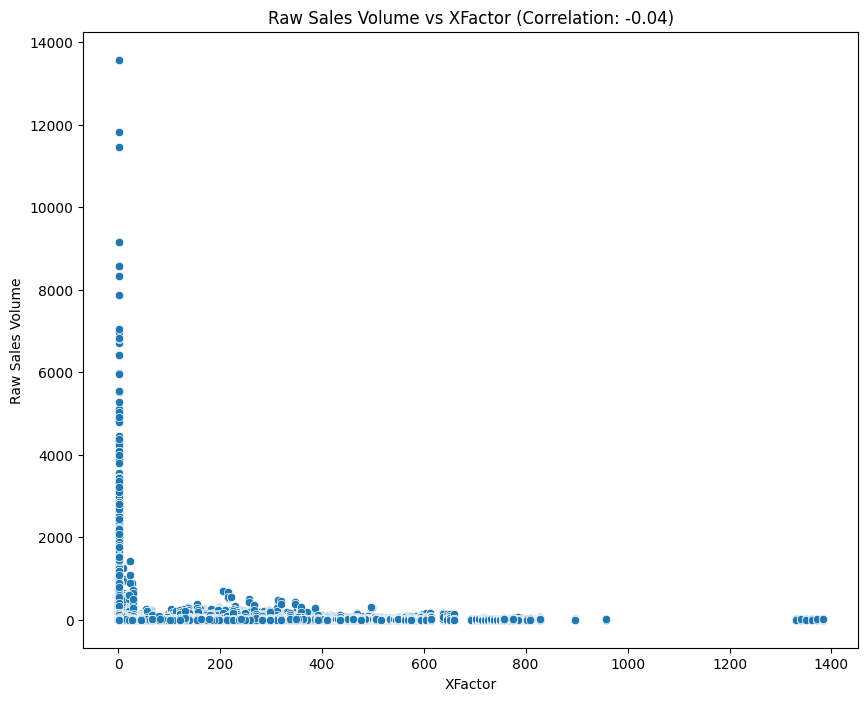

In [ ]:
corr_value = corr.loc['XFactor', 'Raw Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Raw Sales Volume')
plt.title(f'Raw Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Raw Sales Volume')
plt.show()

*   There are a few high raw sales volumes concentrated at lower XFactor values, and as XFactor increases, the raw sales volume tends to be lower and more dispersed.
*   This could suggest that stores with higher XFactors (possibly more stores or outlets) generally have lower individual raw sales volumes, or there might be other underlying factors influencing this trend.



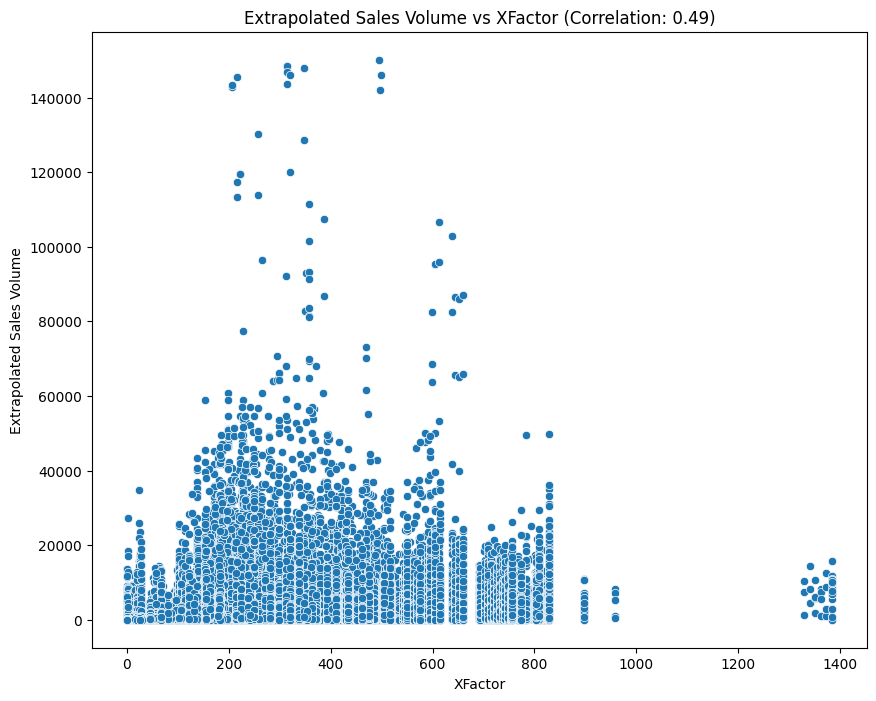

In [ ]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The scatter plot shows a more dispersed pattern, indicating a wider spread of extrapolated sales volumes across different XFactor values.
*   This means that as the number of stores or outlets (XFactor) increases, the extrapolated sales volume tends to increase.



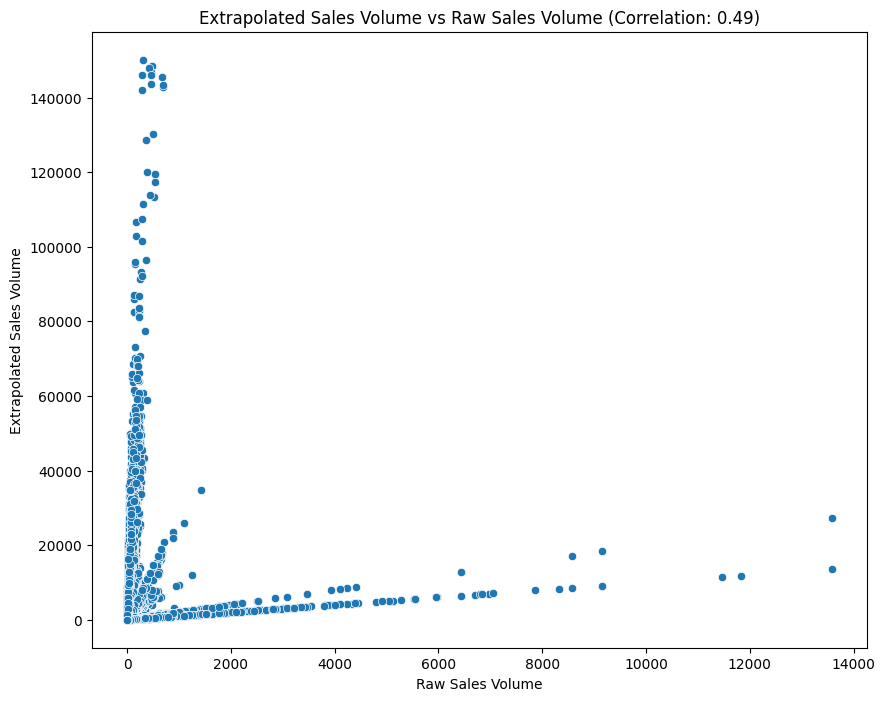

In [ ]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Raw Sales Volume', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs Raw Sales Volume (Correlation: {corr_value:.2f})')
plt.xlabel('Raw Sales Volume')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The plot suggests a positive correlation between extrapolated sales volume and raw sales volume, particularly at lower values.
*   However, as raw sales volume increases, the spread in extrapolated sales volume also increases, showing variability in extrapolation results.



# Data Analysis

## 1. Sales Performance Analysis

Overall Sales Trends: Analyze the Raw Sales Volume and Extrapolated Sales Volume over time to identify trends and seasonality.

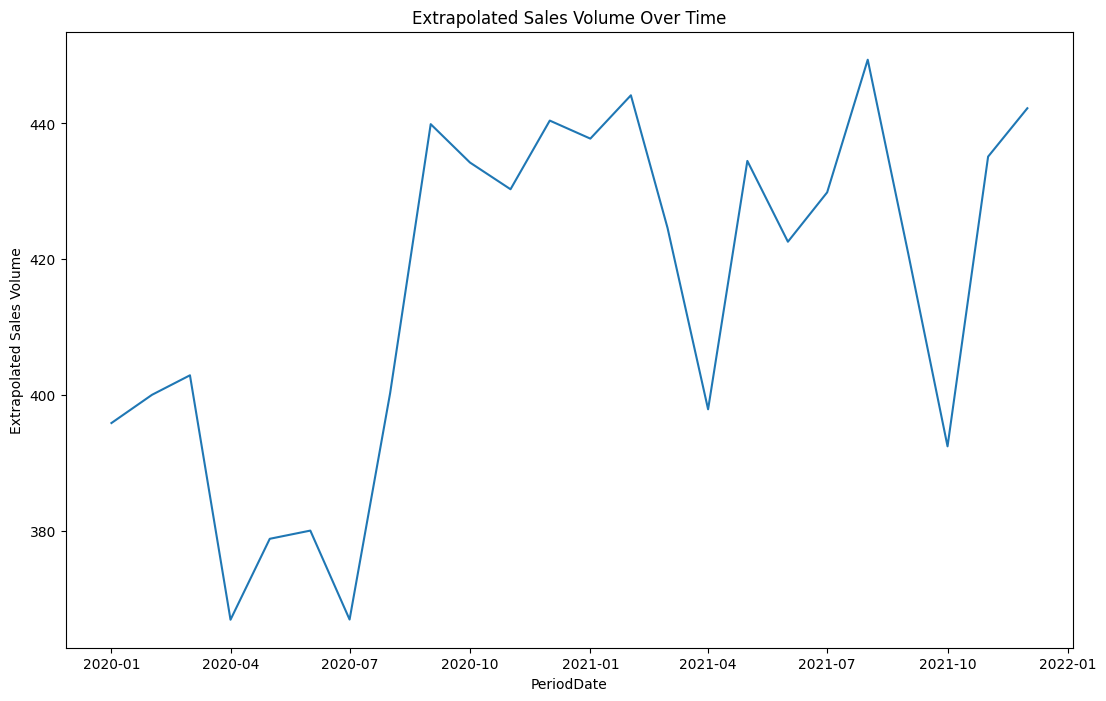

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, ci=None)
plt.title('Extrapolated Sales Volume Over Time')
plt.show()

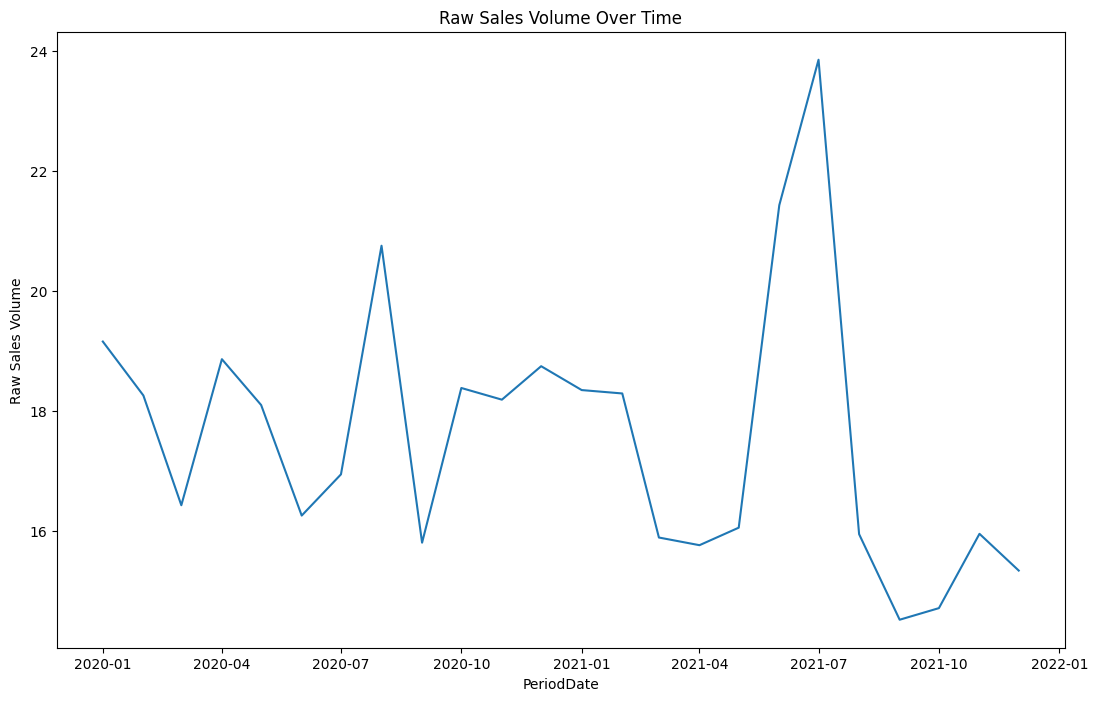

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data, ci=None)
plt.title('Raw Sales Volume Over Time')
plt.show()

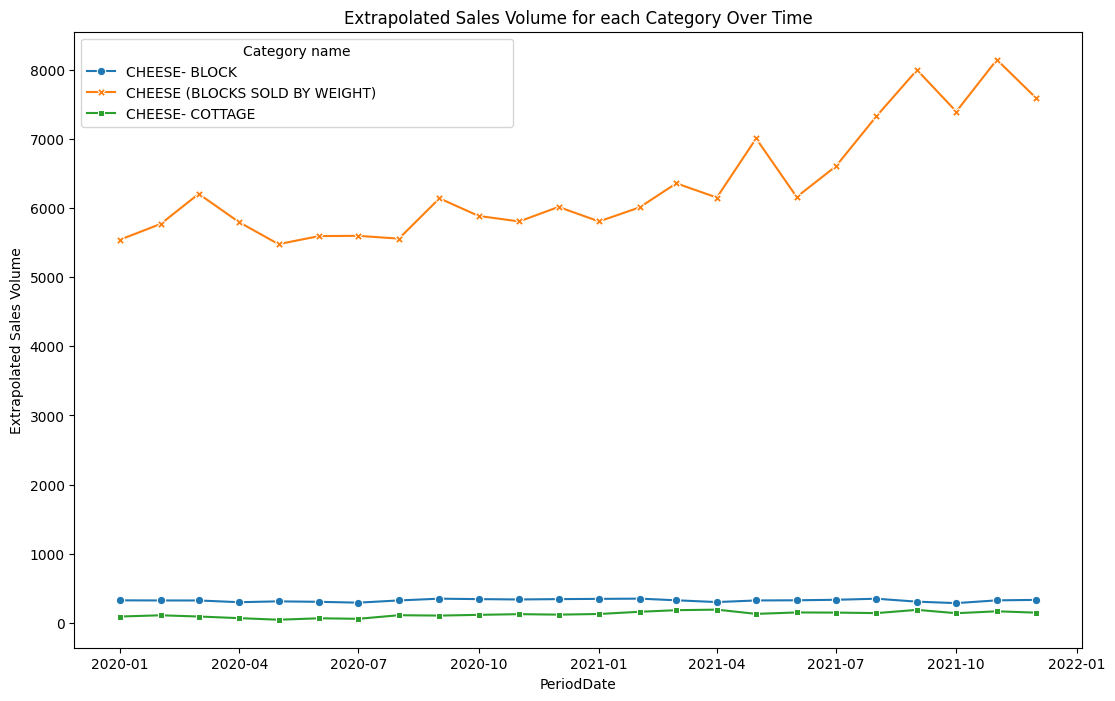

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title('Extrapolated Sales Volume for each Category Over Time')
plt.show()

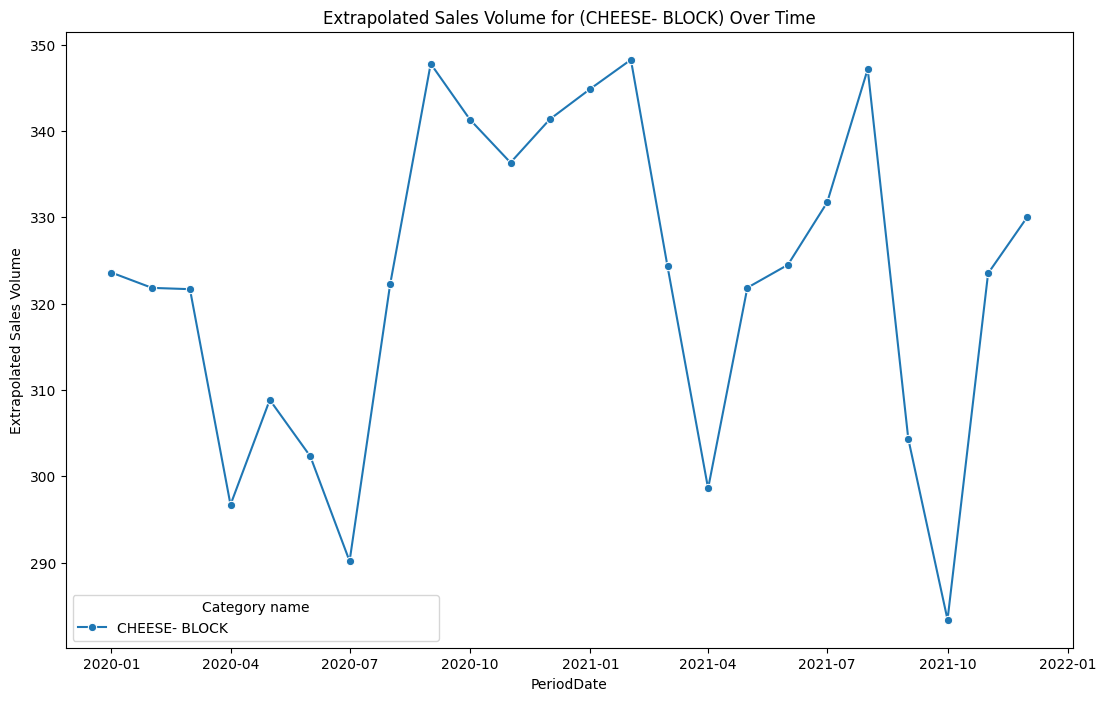

In [ ]:
category_name = 'CHEESE- BLOCK'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(13, 8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')
plt.show()


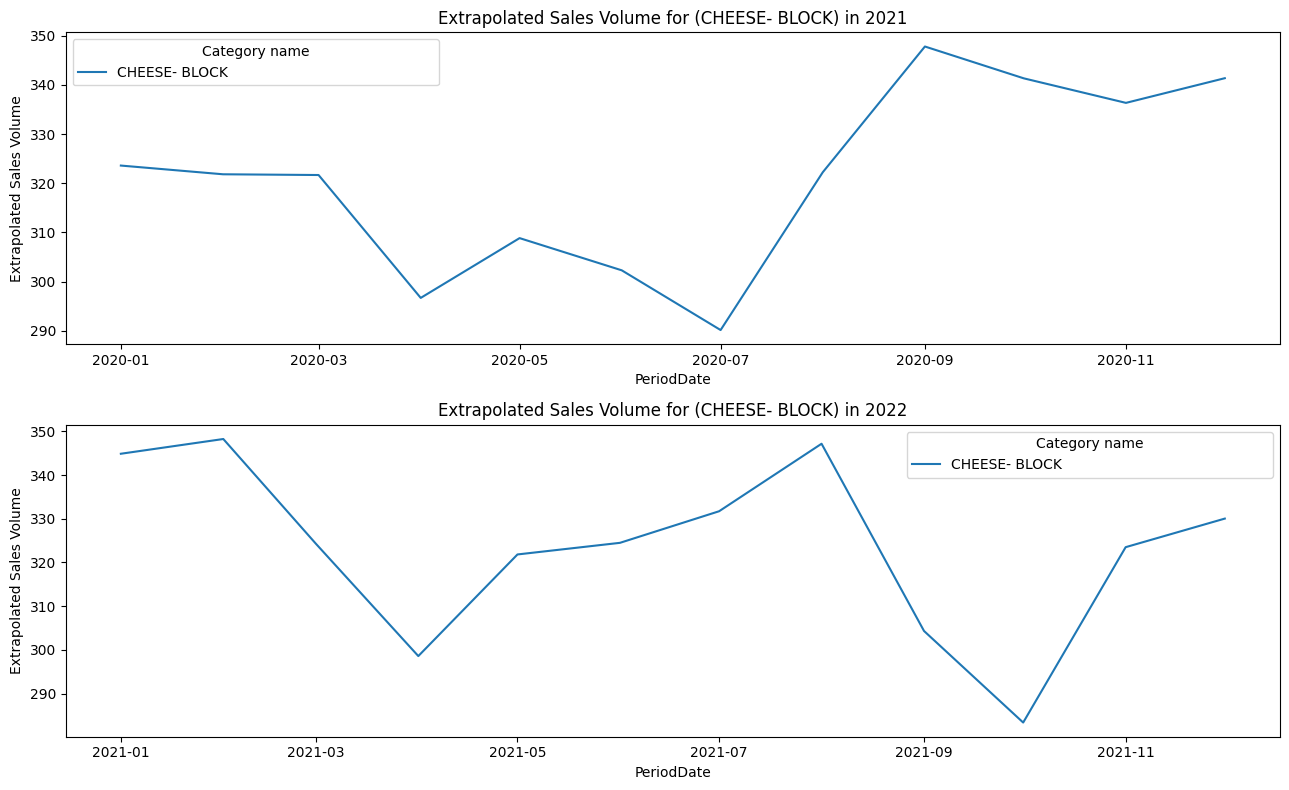

In [ ]:
category_name = 'CHEESE- BLOCK'
filter_date_1 = pd.to_datetime('2021-01-01')
filter_date_2 = pd.to_datetime('2021-01-01')

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date_1]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date_2]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2021')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2022')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

plt.tight_layout()
plt.show()


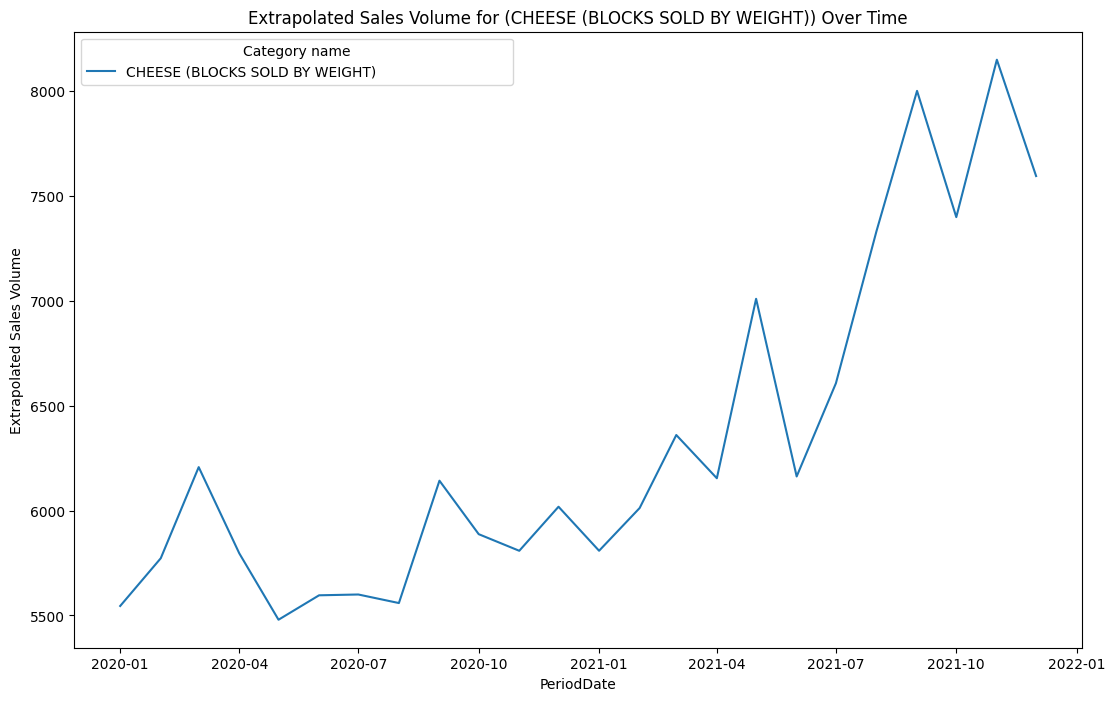

In [ ]:
category_name = 'CHEESE (BLOCKS SOLD BY WEIGHT)'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(13, 8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')
plt.show()


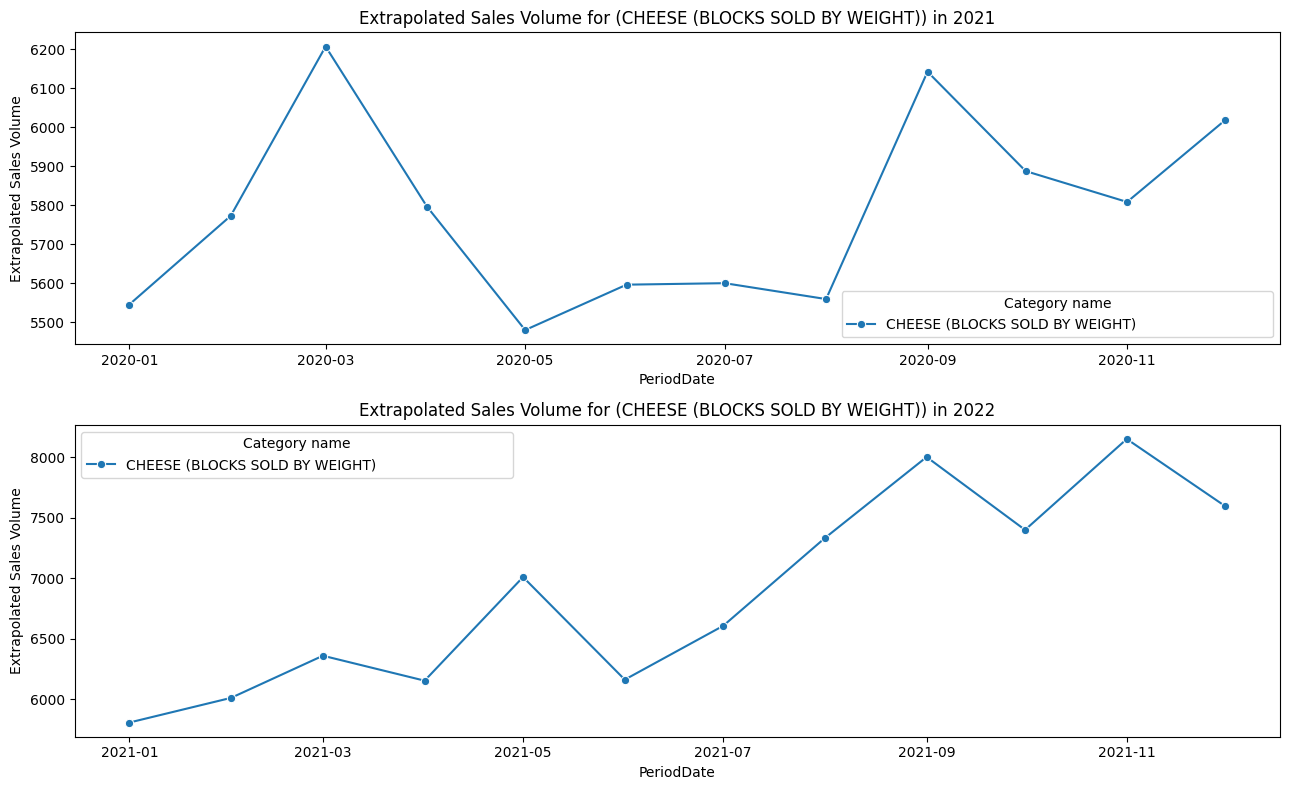

In [ ]:
category_name = 'CHEESE (BLOCKS SOLD BY WEIGHT)'

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date_1]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date_2]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2021')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2022')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

plt.tight_layout()
plt.show()


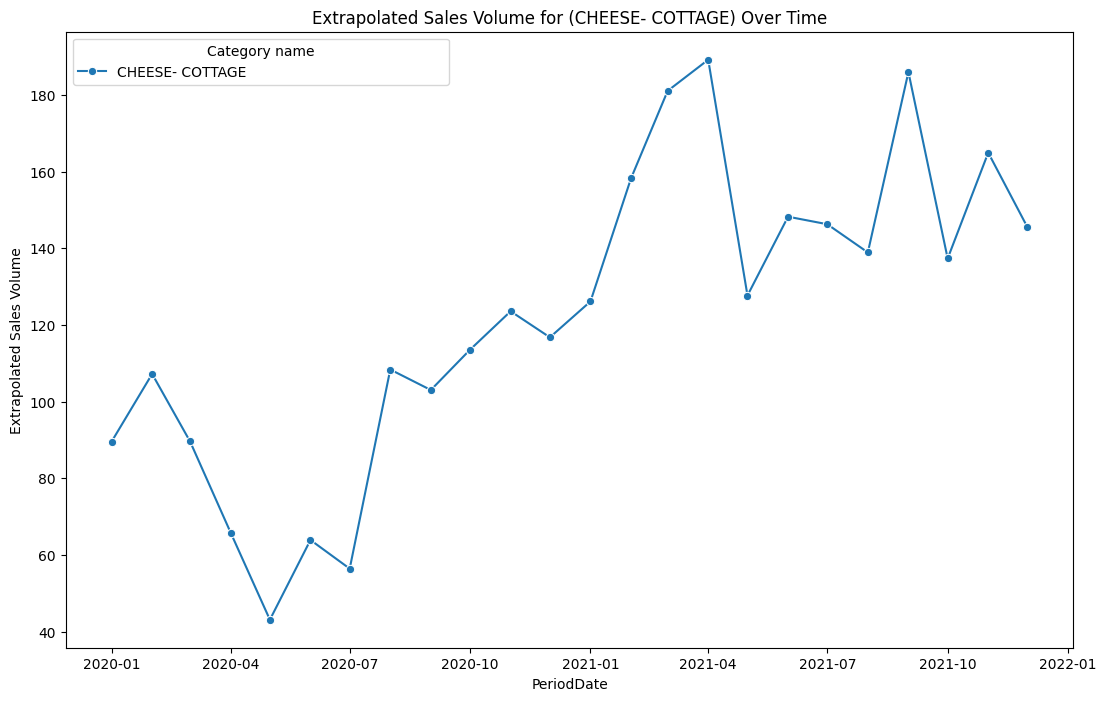

In [ ]:
category_name = 'CHEESE- COTTAGE'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(13, 8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')
plt.show()


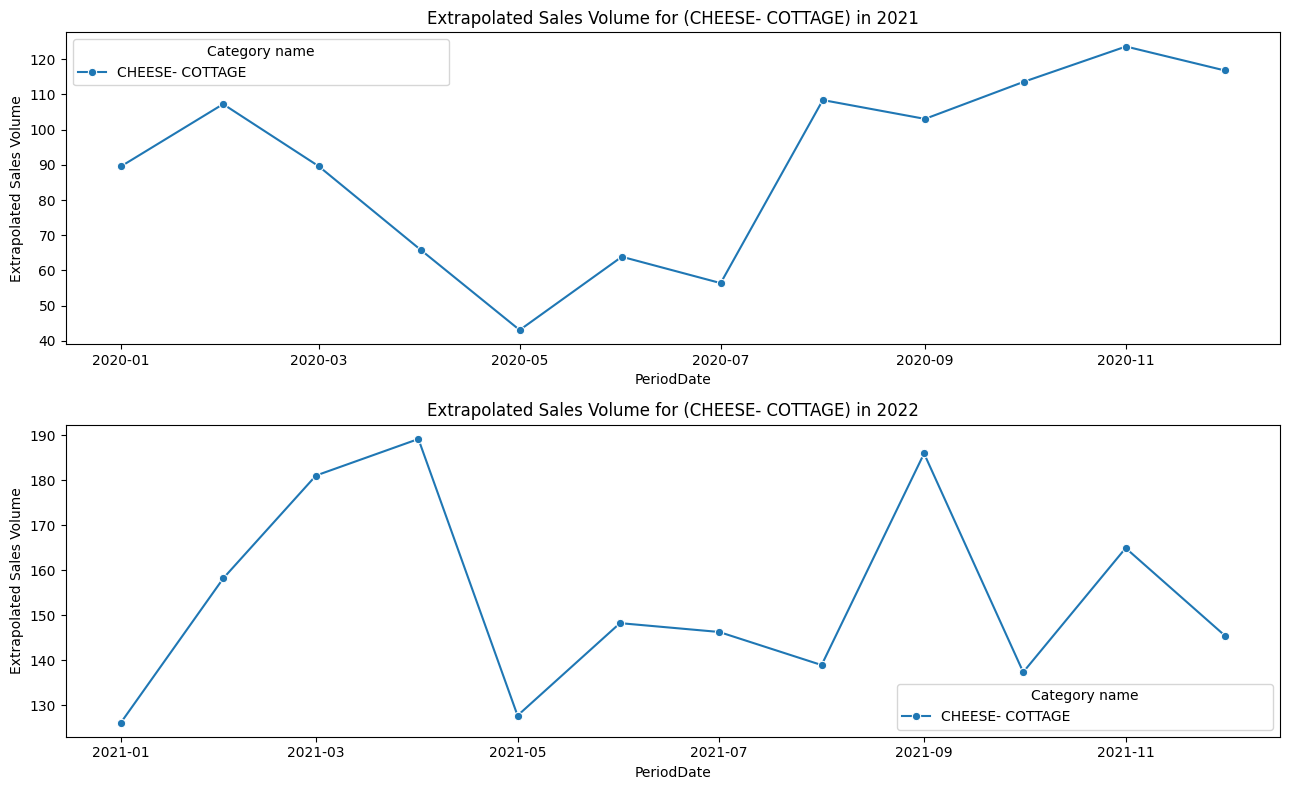

In [ ]:
category_name = 'CHEESE- COTTAGE'

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date_1]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date_2]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2021')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2022')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

plt.tight_layout()
plt.show()


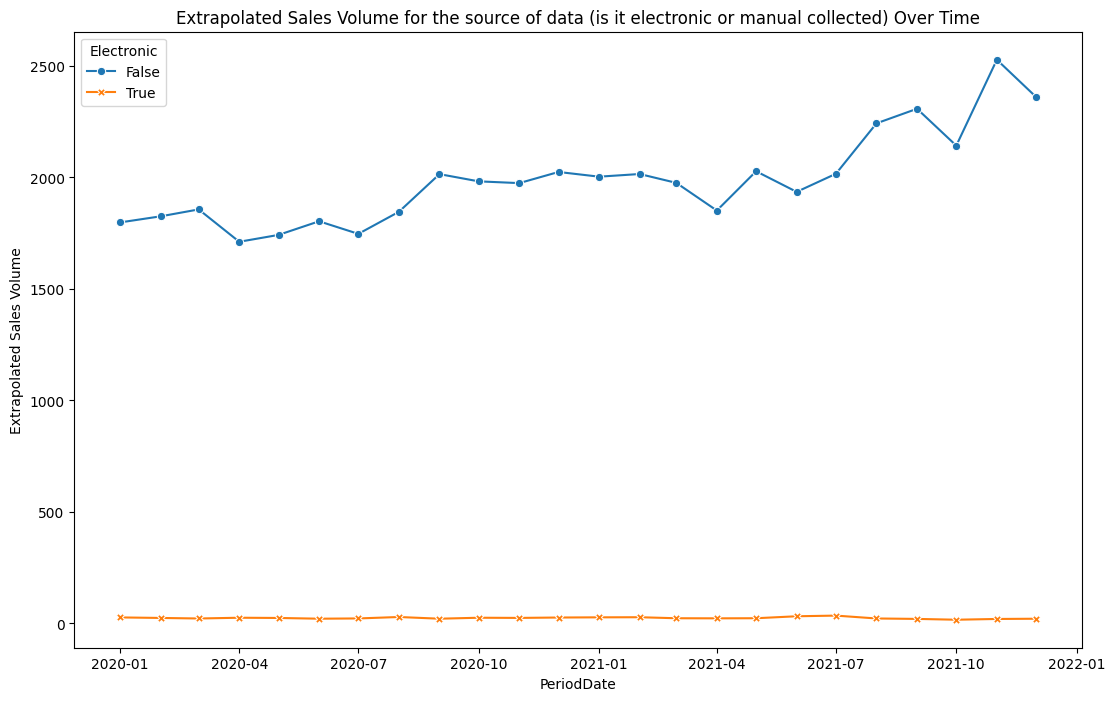

In [ ]:
# Electronic	Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Electronic', ci=None, style='Electronic', markers=True, dashes=False)
plt.title('Extrapolated Sales Volume for the source of data (is it electronic or manual collected) Over Time')
plt.show()

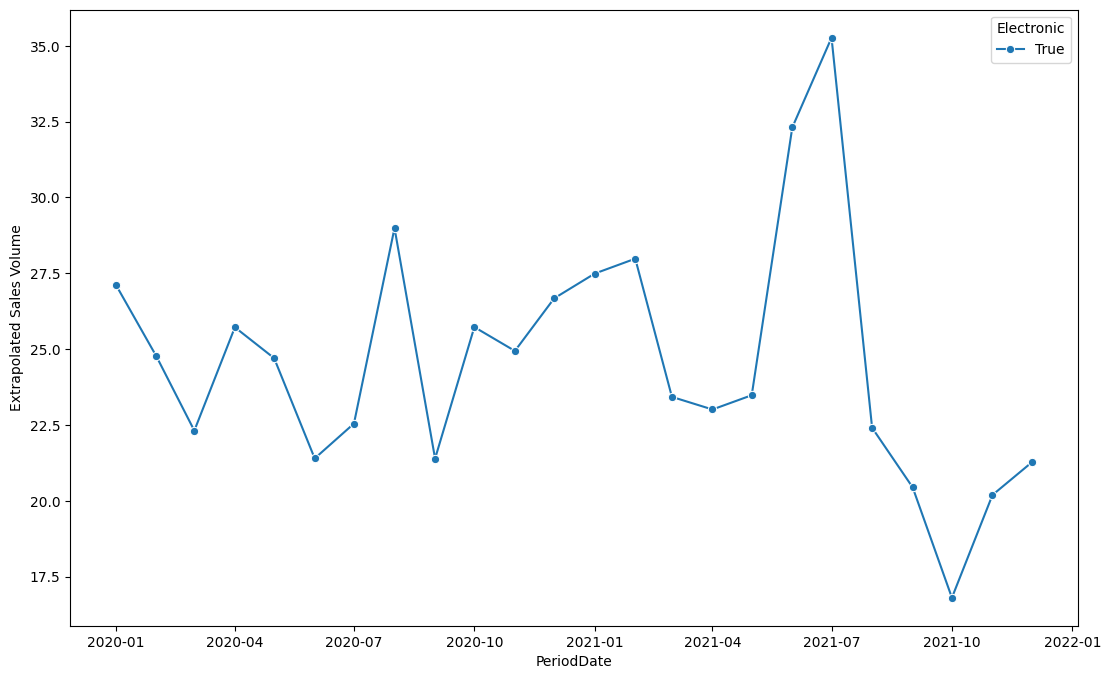

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data[data['Electronic'] == True], hue='Electronic', ci=None, style='Electronic', markers=True)
# plt.title('Extrapolated Sales Volume for each Category Over Time')
plt.show()

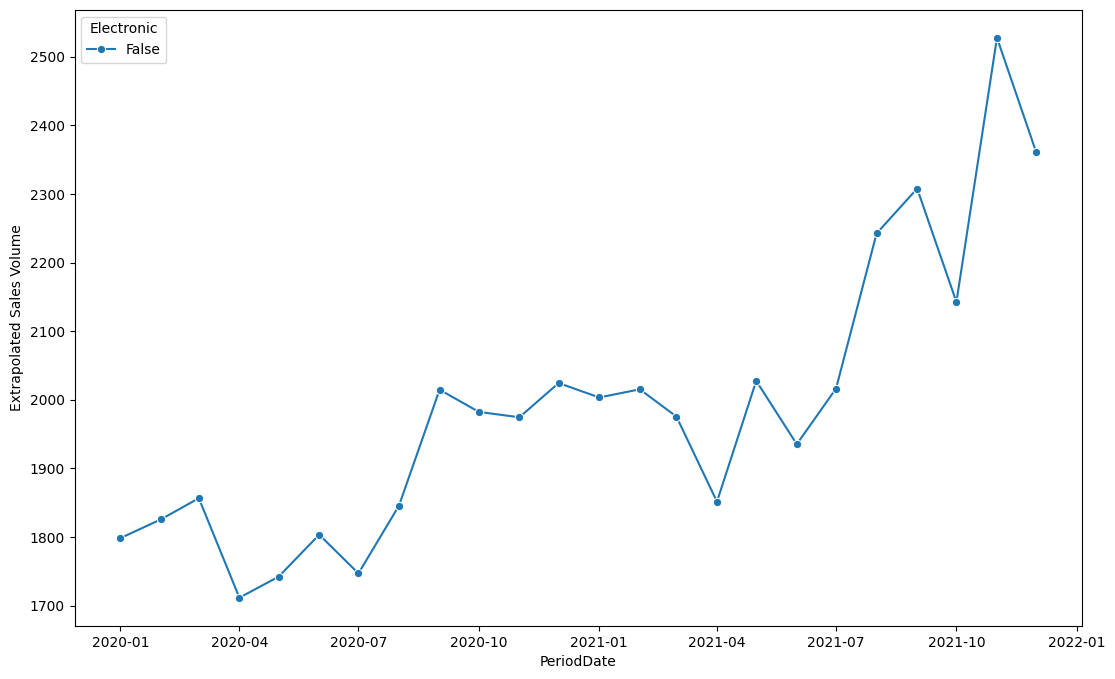

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data[data['Electronic'] == False], hue='Electronic', ci=None, style='Electronic', markers=True)
# plt.title('Extrapolated Sales Volume for each Category Over Time')
plt.show()

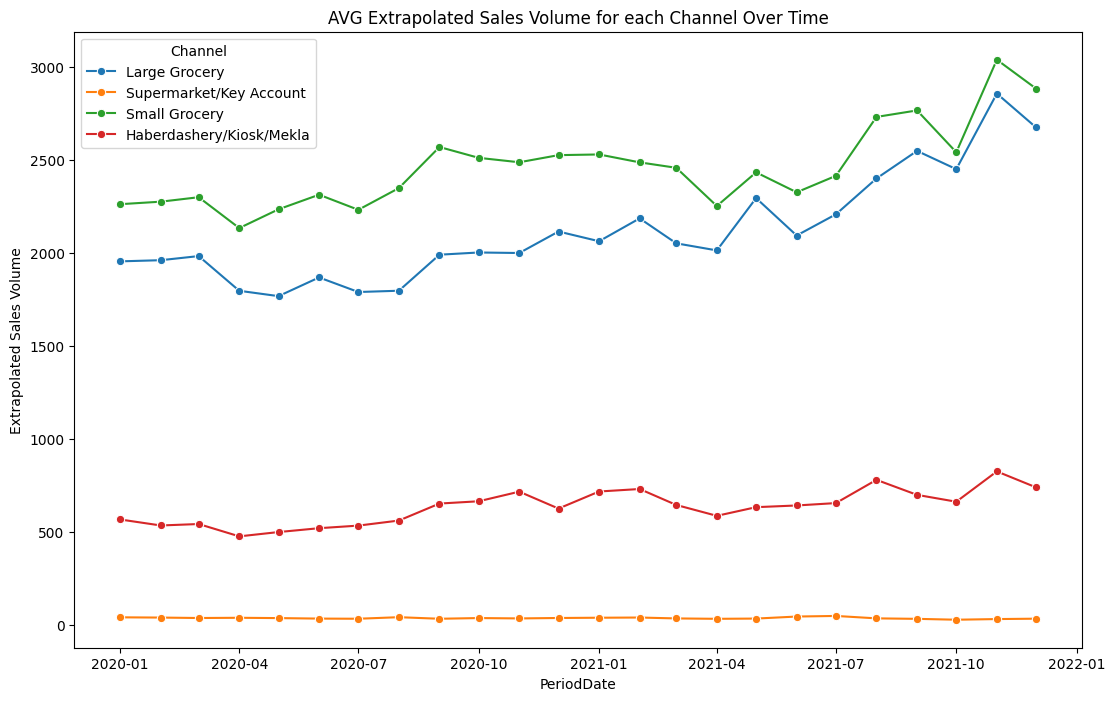

In [131]:
channels = data['Channel'].unique()
markers_dict = {channel: 'o' for channel in channels}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Channel', ci=None, style='Channel', markers=markers_dict, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Channel Over Time')
plt.show()

### Regional Sales Comparison: Compare sales volumes and Extrapolated Sales Volume across different Regions to understand regional performance.

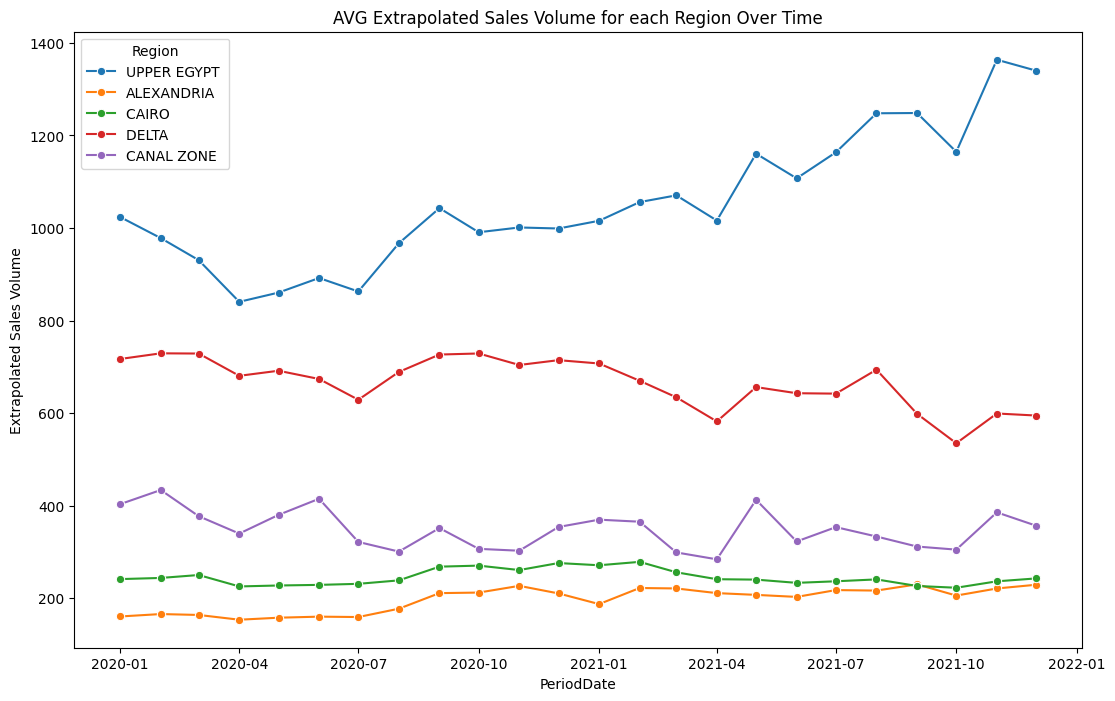

In [120]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Region Over Time')
plt.show()

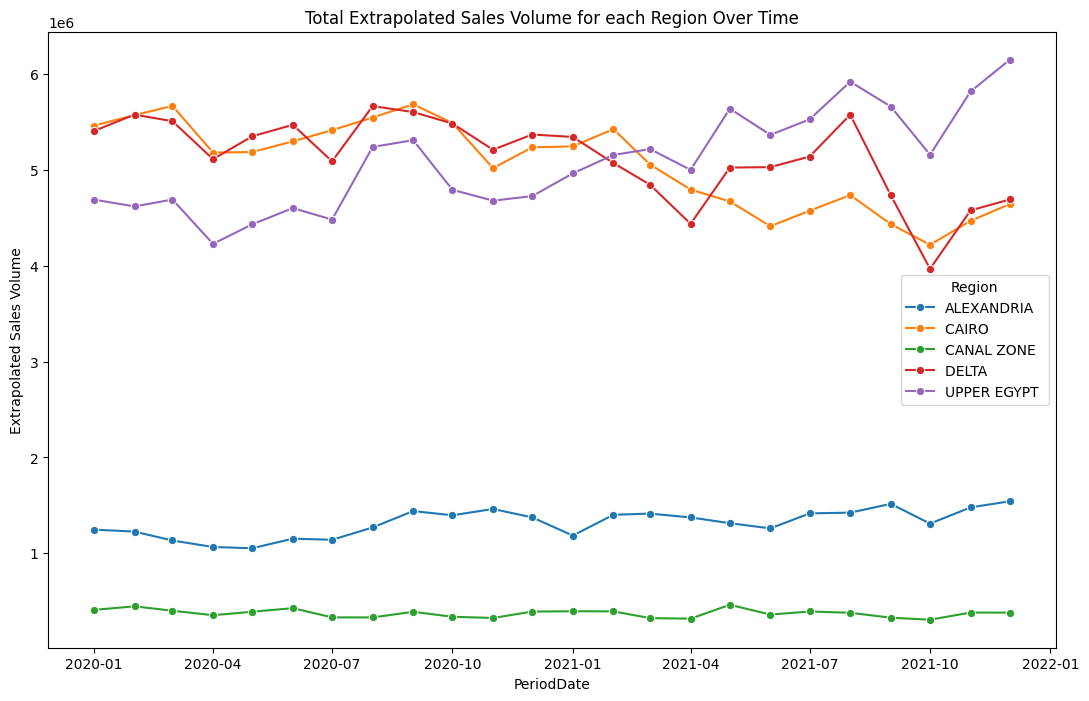

In [130]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['Extrapolated Sales Volume'].sum().reset_index()

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Region Over Time')
plt.show()

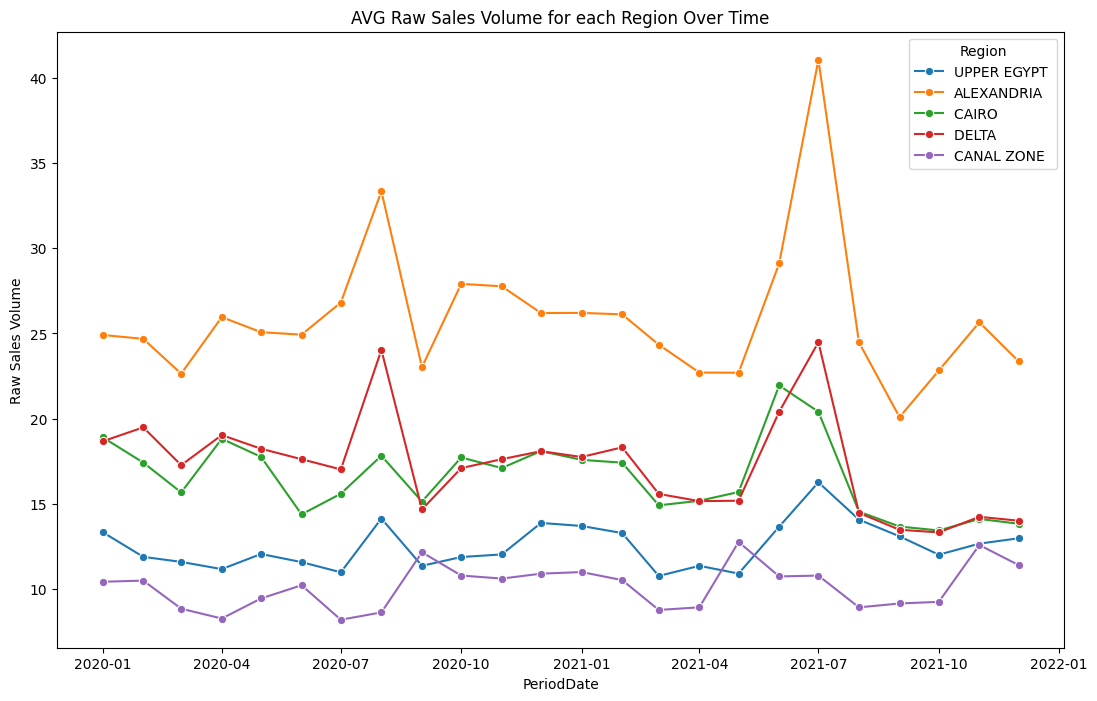

In [122]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Raw Sales Volume for each Region Over Time')
plt.show()

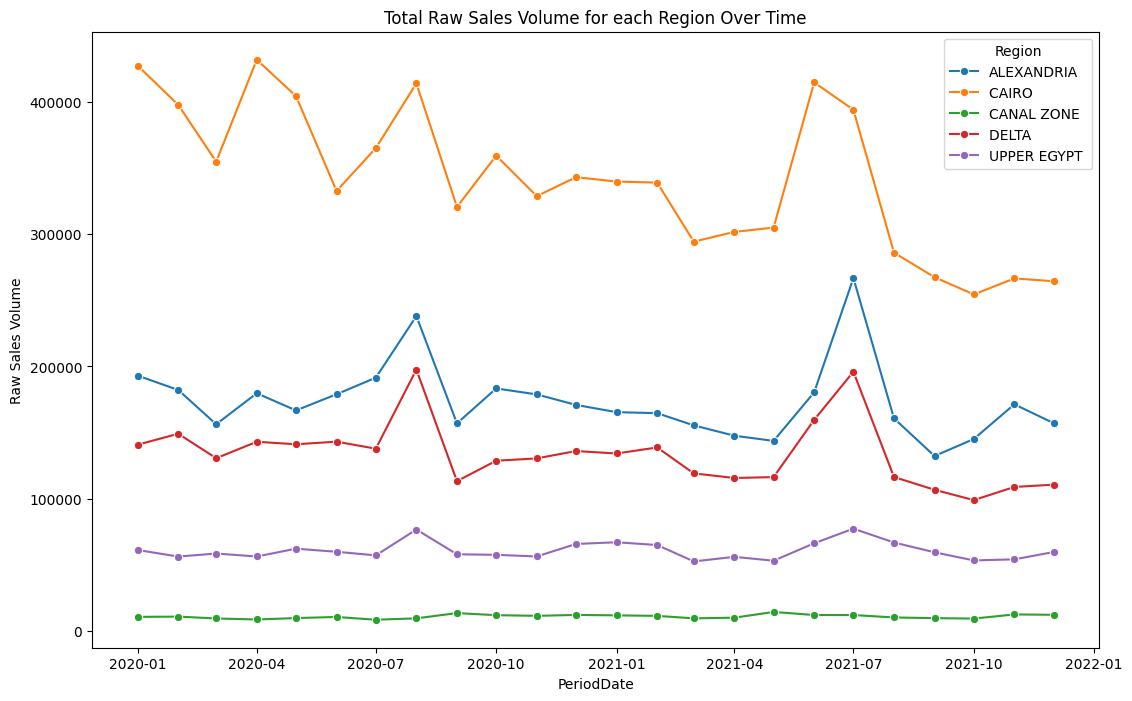

In [121]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['Raw Sales Volume'].sum().reset_index()

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Raw Sales Volume for each Region Over Time')
plt.show()

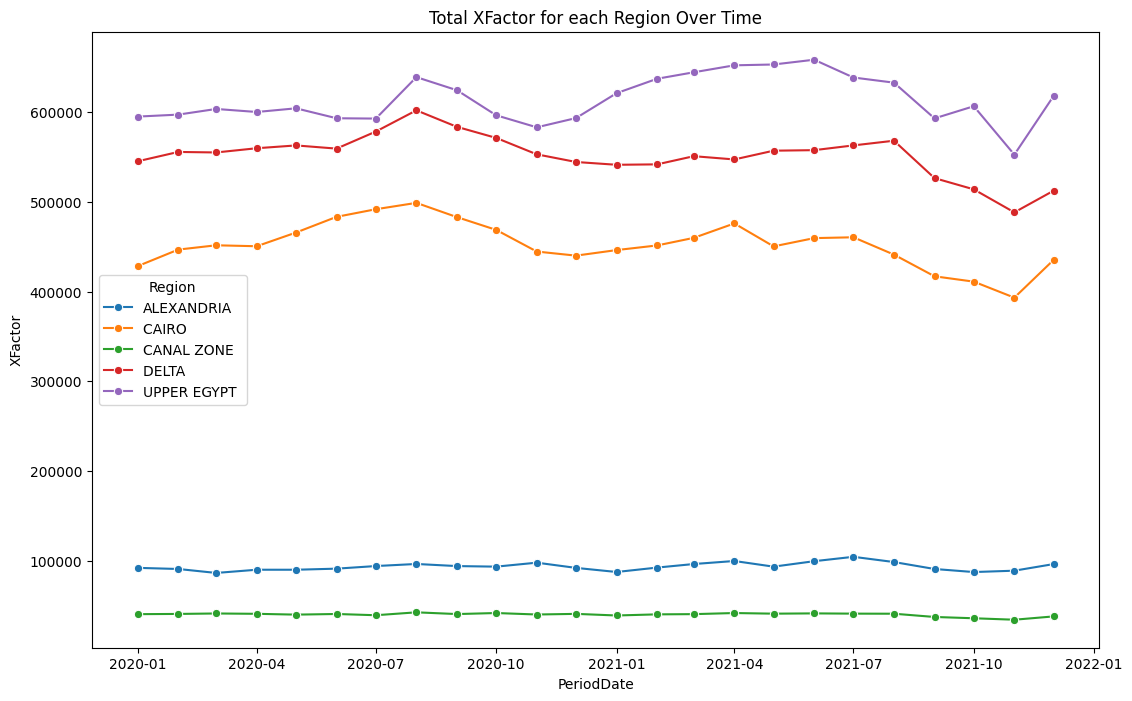

In [124]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['XFactor'].sum().reset_index()

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(13,8))
sns.lineplot(x='PeriodDate', y='XFactor', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total XFactor for each Region Over Time')
plt.show()

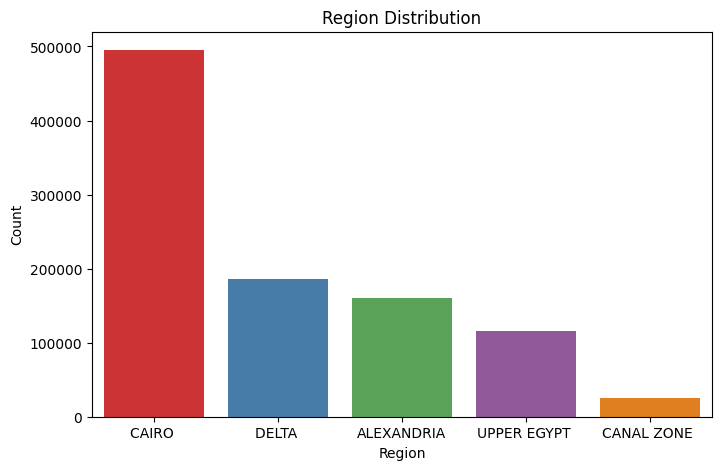

In [129]:
region_counts = data['Region'].value_counts()
sorted_regions = region_counts.index

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Region', palette = "Set1", order=sorted_regions)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Region'].unique()

array(['UPPER EGYPT ', 'ALEXANDRIA', 'CAIRO ', 'DELTA ', 'CANAL ZONE '],
      dtype=object)

In [ ]:
data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values()

,Extrapolated Sales Volume
Region,
CANAL ZONE,8.950260e+06
ALEXANDRIA,3.159240e+07
CAIRO,1.214433e+08
UPPER EGYPT,1.220755e+08
DELTA,1.232922e+08


In [135]:
data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values()

,Extrapolated Sales Volume
Region,
ALEXANDRIA,196.435958
CAIRO,245.256226
CANAL ZONE,349.155824
DELTA,665.297326
UPPER EGYPT,1050.355439


**DELTA, CAIRO and UPPER EGYPT** have the highest extrapolated sales volume at approximately 122 million liters

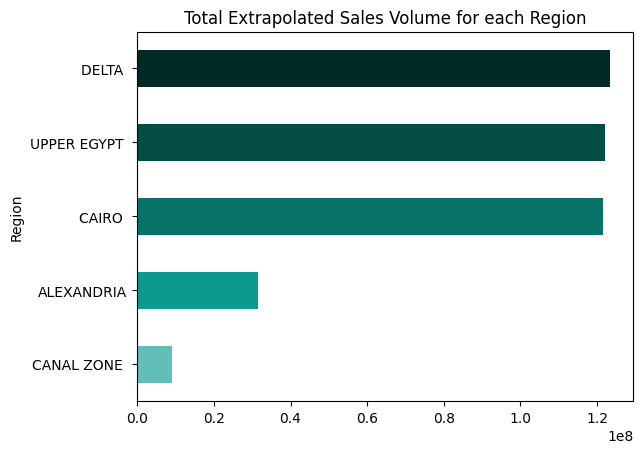

In [133]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44", "#002B24"]
data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('Total Extrapolated Sales Volume for each Region')
plt.show()

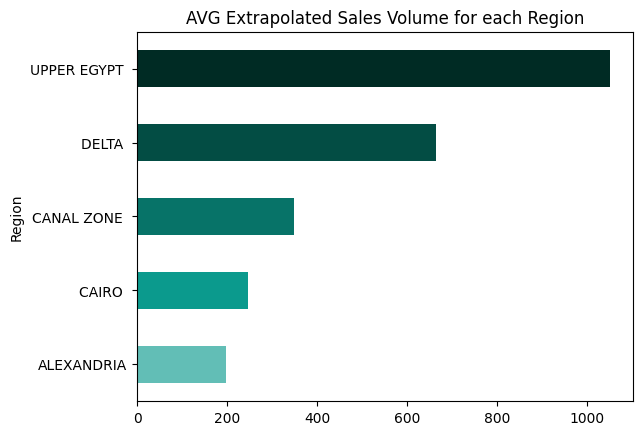

In [134]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44", "#002B24"]
data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values().plot(kind='barh', color=colors)
plt.title('AVG Extrapolated Sales Volume for each Region')
plt.show()

In [ ]:
data.groupby('Region')['Raw Sales Volume'].sum()

,Raw Sales Volume
Region,
ALEXANDRIA,4.166585e+06
CAIRO,8.207066e+06
CANAL ZONE,2.608967e+05
DELTA,3.212155e+06
UPPER EGYPT,1.455635e+06


*   **CAIRO** leads in raw sales volume with approximately 8.21 million kilograms, which indicates high actual sales in stores before any extrapolation
*   **ALEXANDRIA** follows with 4.17 million kilograms, showing strong sales performance in this region as well.




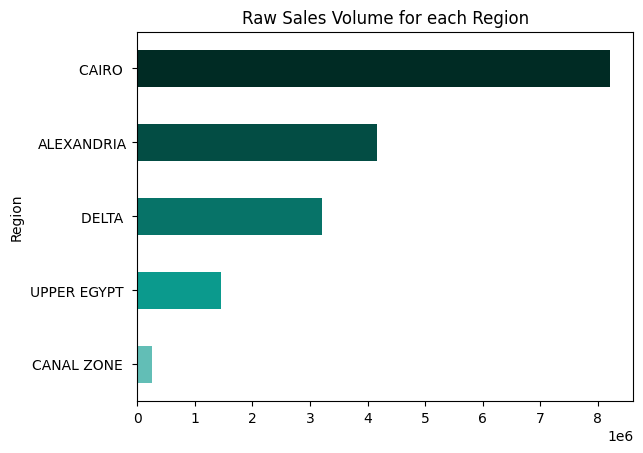

In [ ]:
data.groupby('Region')['Raw Sales Volume'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('Raw Sales Volume for each Region')
plt.show()

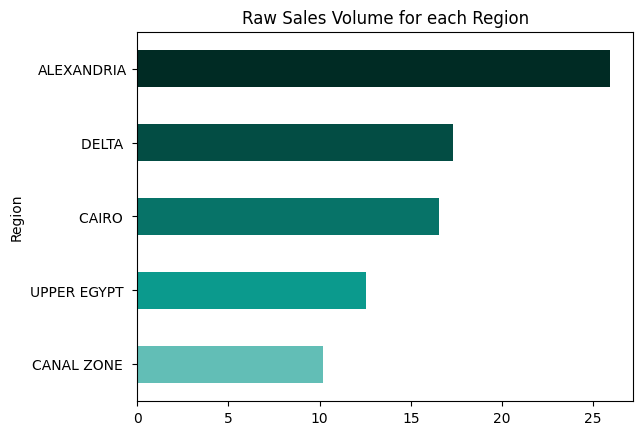

In [136]:
data.groupby('Region')['Raw Sales Volume'].mean().sort_values().plot(kind='barh', color=colors)
plt.title('Raw Sales Volume for each Region')
plt.show()

In [ ]:
data.groupby('Region')['XFactor'].sum()

,XFactor
Region,
ALEXANDRIA,2.237020e+06
CAIRO,1.085552e+07
CANAL ZONE,9.526042e+05
DELTA,1.324081e+07
UPPER EGYPT,1.473409e+07


*   **DELTA and UPPER EGYPT** have the highest XFactor values, with 13.24 million and 14.73 million, respectively, indicating a large number of similar stores in these regions. This suggests a significant market representation and potential for sales extrapolation.

*   CAIRO also has a high XFactor value of 10.86 million, which, combined with its high raw sales, supports its high extrapolated sales volume.


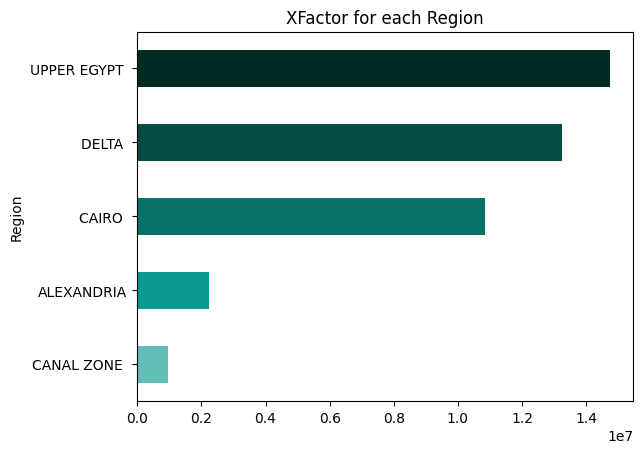

In [ ]:
data.groupby('Region')['XFactor'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('XFactor for each Region')
plt.show()

## Conclusion


1.   Regions with high XFactor values like DELTA and UPPER EGYPT indicate significant market potential with many similar stores, even if raw sales are not as high.
2.   CAIRO leads in raw sales, showing strong concentration of sales activities. However, the extrapolated volumes suggest that UPPER EGYPT and DELTA are also critical markets when considering the entire universe of similar stores.
3.   Strategies could be tailored to capitalize on the high raw sales in CAIRO and ALEXANDRIA, while leveraging the large store networks in DELTA and UPPER EGYPT to maximize overall market coverage
4.   CANAL ZONE, with its lower sales and smaller XFactor.

### Evaluate sales performance by Channel to determine which channels are most effective for different product categories.

In [ ]:
data['Channel'].unique()

array(['Large Grocery', 'Supermarket/Key Account', 'Small Grocery',
       'Haberdashery/Kiosk/Mekla'], dtype=object)

*   **Small Grocery** has the highest extrapolated sales volume at approximately 231 million liters.
*   **Large Grocery** is the second with 138 million liters.
*   **Haberdashery/Kiosk/Mekla** has the lowest extrapolated sales volume with just 6 million liters.



In [ ]:
data.groupby('Channel')['Extrapolated Sales Volume'].sum()

,Extrapolated Sales Volume
Channel,
Haberdashery/Kiosk/Mekla,6.406198e+06
Large Grocery,1.386424e+08
Small Grocery,2.314723e+08
Supermarket/Key Account,3.083276e+07


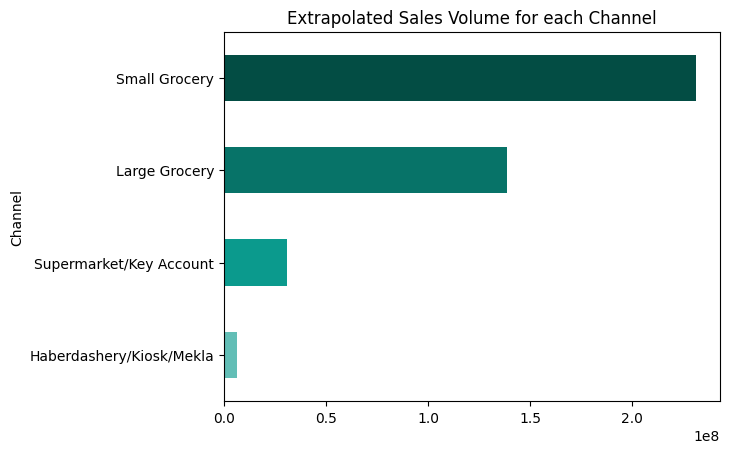

In [ ]:
data.groupby('Channel')['Extrapolated Sales Volume'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('Extrapolated Sales Volume for each Channel')
plt.show()

In [ ]:
data.groupby('Channel')['Raw Sales Volume'].sum()

,Raw Sales Volume
Channel,
Haberdashery/Kiosk/Mekla,6.638890e+04
Large Grocery,8.124544e+05
Small Grocery,7.974301e+05
Supermarket/Key Account,1.562606e+07


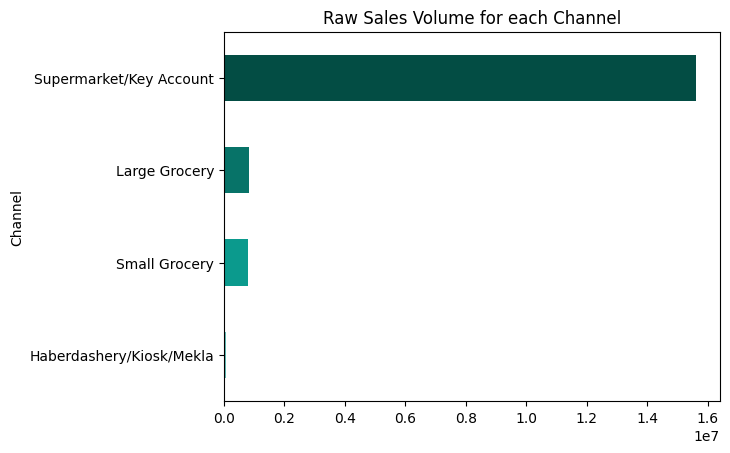

In [ ]:
data.groupby('Channel')['Raw Sales Volume'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('Raw Sales Volume for each Channel')
plt.show()

In [ ]:
data.groupby('Channel')['XFactor'].sum()

,XFactor
Channel,
Haberdashery/Kiosk/Mekla,1.012657e+06
Large Grocery,1.151130e+07
Small Grocery,2.766097e+07
Supermarket/Key Account,1.835125e+06


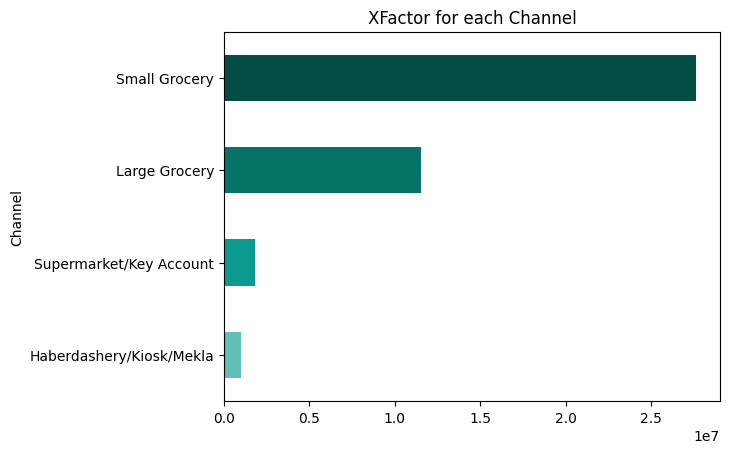

In [ ]:
data.groupby('Channel')['XFactor'].sum().sort_values().plot(kind='barh', color=colors)
plt.title('XFactor for each Channel')
plt.show()

## Conclusion

1. **Small Grocery** channels demonstrate the most significant difference between raw and extrapolated sales volumes, which can be attributed to their large number of similar stores (high XFactor). This suggests that while each store may not sell much individually, collectively, they represent a large market share.
2. **Large Grocery** stores also show a notable increase from raw to extrapolated sales due to a high XFactor, indicating a strong presence in the market.
3. **Supermarket/Key Account** channels, while having the highest raw sales, do not see as large an increase in extrapolated sales due to a lower XFactor, suggesting that these channels are more concentrated and have fewer similar stores.
4. **Haberdashery/Kiosk/Mekla** has minimal growth from raw to extrapolated sales, reflecting its limited market reach and smaller store network.


Regional Sales Performance by Channel

In [ ]:
data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla    9.871599e+04
              Large Grocery               1.264391e+07
              Small Grocery               1.403798e+07
              Supermarket/Key Account     4.811793e+06
CAIRO         Haberdashery/Kiosk/Mekla    1.463556e+06
              Large Grocery               5.315480e+07
              Small Grocery               5.334429e+07
              Supermarket/Key Account     1.348063e+07
CANAL ZONE    Haberdashery/Kiosk/Mekla    2.803483e+05
              Large Grocery               4.589235e+06
              Small Grocery               3.675531e+06
              Supermarket/Key Account     4.051457e+05
DELTA         Haberdashery/Kiosk/Mekla    1.051302e+06
              Large Grocery               3.778239e+07
              Small Grocery               7.614197e+07
              Supermarket/Key Account     8.316577e+06
UPPER EGYPT   Haberdashery/Kiosk/Mekla    3.512276e+06
              Large Grocery               3.047208e+07
              Small Grocery               8.427250e+07
              Supermarket/Key Account     3.818605e+06
Name: Extrapolated Sales Volume, dtype: float64

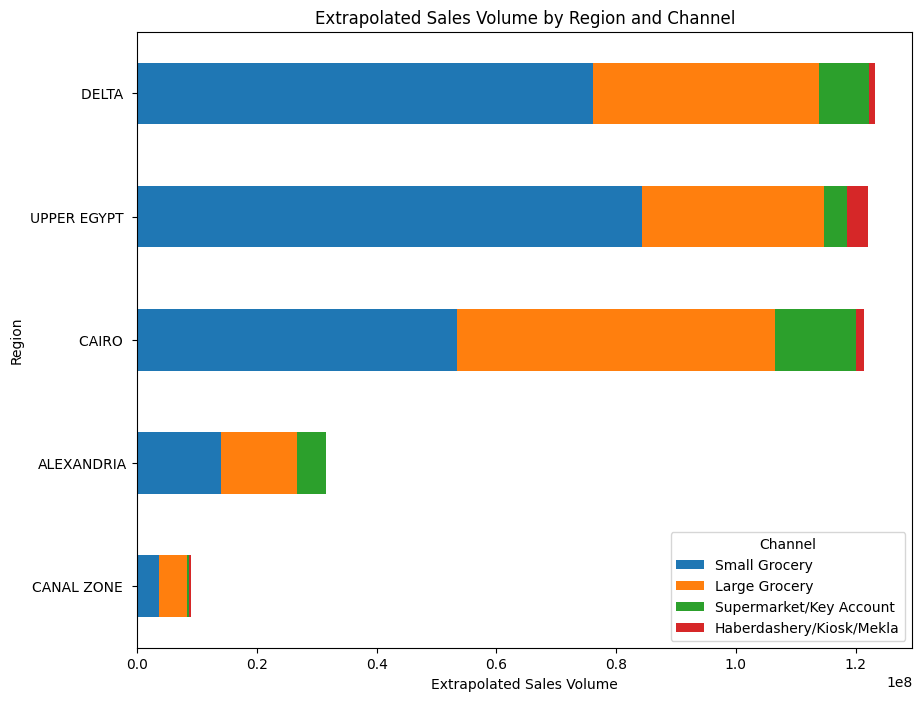

In [ ]:
grouped_data = data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()
sorted_data = grouped_data.groupby(level=0).sum().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).sum().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

grouped_data.unstack().plot(kind='barh', stacked=True, figsize=(10,8))

plt.title('Extrapolated Sales Volume by Region and Channel')
plt.xlabel('Extrapolated Sales Volume')
plt.ylabel('Region')
plt.show()

## Conclusion

*  **UPPER EGYPT** shows a strong performance in the **Small Grocery** channel with an extrapolated sales volume of 84.27 million, which is the highest among all regions and channels.

*  **DELTA** also performs well in the **Small Grocery** channel with 76.14 million in extrapolated sales.

*  **CAIRO** has the highest sales in the **Large Grocery** channel, contributing significantly to its total sales.

*  **Small Groceries** have consistently high sales because of high XFactors across all regions, making them a key channel to focus on for maximizing sales.

*  **Supermarket/Key Account** channels show significant sales in Cairo and Delta, while regions like Canal Zone have much lower sales in this channel.

*  **Haberdashery/Kiosk/Mekla** channels generally show lower sales across all regions, with the highest being in Upper Egypt at 3.51 million. This channel contributes the least to the overall sales volume, indicating it might not be the primary focus for growth.






Analysis of how sales differ between Electronic and non-Electronic outlets

In [ ]:
data['Electronic'].value_counts()

,count
Electronic,
True,786365
False,196808


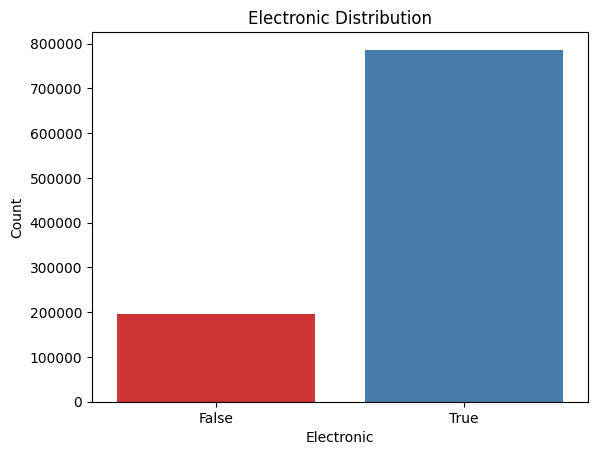

In [ ]:
sns.countplot(data=data, x='Electronic', palette = "Set1")
plt.title('Electronic Distribution')
plt.xlabel('Electronic')
plt.ylabel('Count')
plt.show()

While the True category, representing electronic data received from retailers, is more prevalent in terms of count, the False category, which represents manually collected data by the Nielsen Field team, is significantly more impactful in terms of total sales volume.  
This suggests that the data collected manually may involve higher-value items or bulk sales, leading to a greater overall contribution to the Extrapolated Sales Volume.

In [ ]:
data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum()

,Extrapolated Sales Volume
Electronic,
False,3.880298e+08
True,1.932382e+07


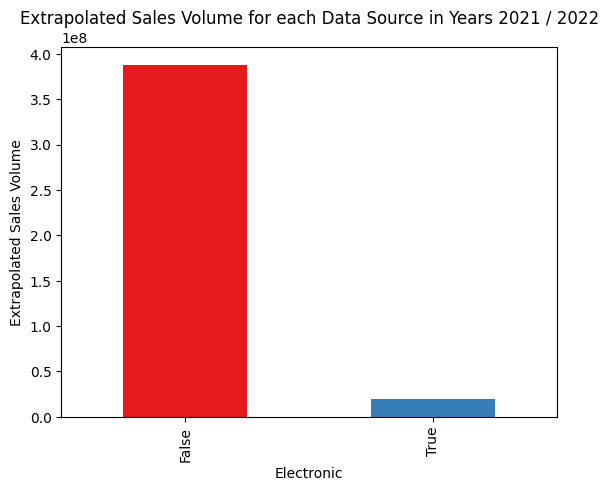

In [ ]:
palette = sns.color_palette('Set1', 2)

data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum().plot(kind='bar', color= palette)
plt.title('Extrapolated Sales Volume for each Data Source in Years 2021 / 2022')
plt.xlabel('Electronic')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

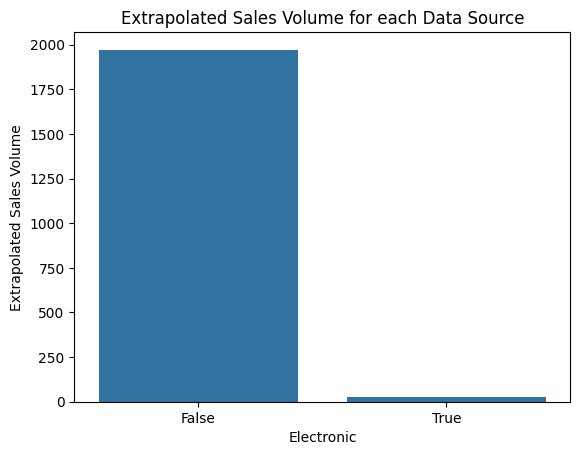

In [ ]:
# The mean
sns.barplot(x='Electronic', y='Extrapolated Sales Volume', data=data, errorbar=None)
plt.title('Extrapolated Sales Volume for each Data Source')
plt.show()

# 2. Product and Brand Analysis

#### Identify top-selling Products and Brands based on Raw Sales Volume and Extrapolated Sales Volume.

In [ ]:
data['Product name'].nunique()

1749

In [ ]:
from re import sub
def format_label(label):
    label = sub(r'[\(\)]', '', label)
    label = sub('-', ' ', label)
    return '\n'.join(label.strip().split())


def format_millions(value):
    return f'{value / 1e6:.1f}M'

<ipython-input-73-7059fb2185ab>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_30_labels)


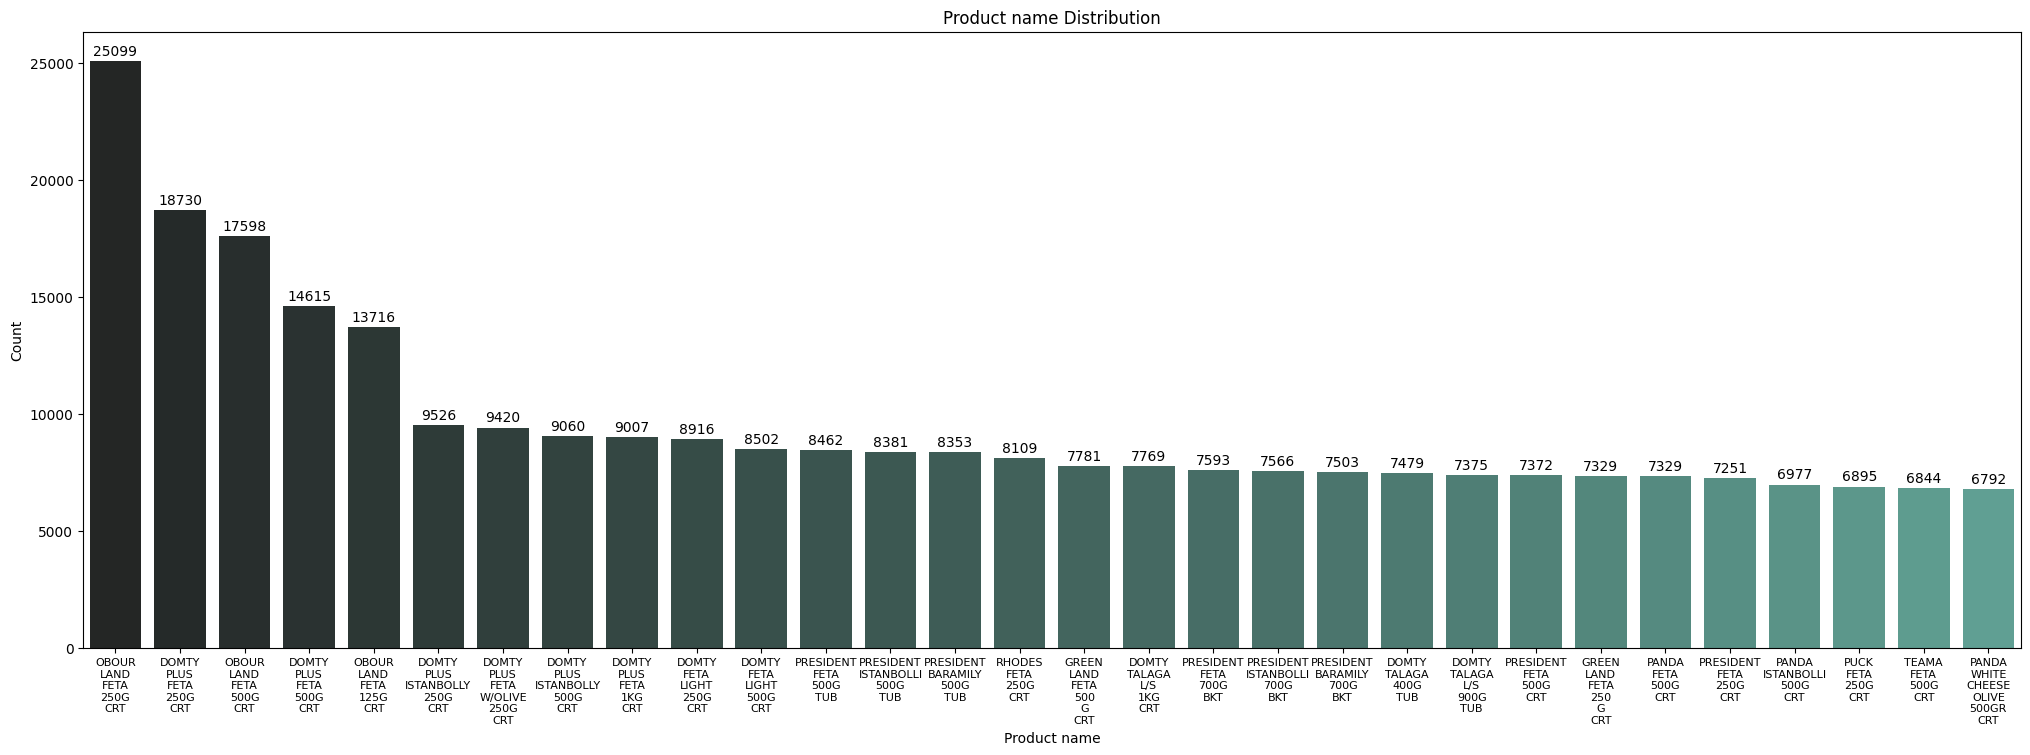

In [ ]:
product_counts = data['Product name'].value_counts()
top_30_products = product_counts.head(30)
top_30_data = data[data['Product name'].isin(top_30_products.index)]

top_30_labels = [format_label(label) for label in top_30_products.index]

plt.figure(figsize=(25,8))
ax = sns.countplot(data=top_30_data, x='Product name', order=top_30_products.index, palette="dark:#5A9")
plt.title('Product name Distribution')
plt.xlabel('Product name')
plt.ylabel('Count')
plt.xticks(fontsize=8)
ax.set_xticklabels(top_30_labels)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.show()

In [ ]:
product_sales = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)

product_sales.values

array([58026732.29679775, 33644398.769221  , 22075603.509839  ,
       17767640.1685981 , 15781479.6212795 ,  7466986.2875235 ,
        5654574.4719245 ,  5412035.3765965 ,  5405734.63664437,
        5056522.04765825,  4753024.17328625,  3995435.214105  ,
        3474776.87589425,  3349668.49824   ,  3118303.371908  ,
        2846419.66832575,  2787665.881323  ,  2749137.64829575,
        2657322.33555025,  2588729.0505885 ,  2496819.3081185 ,
        2093747.53604575,  1934060.01949575,  1873019.1730405 ,
        1768914.7421155 ,  1687516.95118375,  1583567.64461   ,
        1578001.570938  ,  1457780.5103315 ,  1416279.0273665 ])

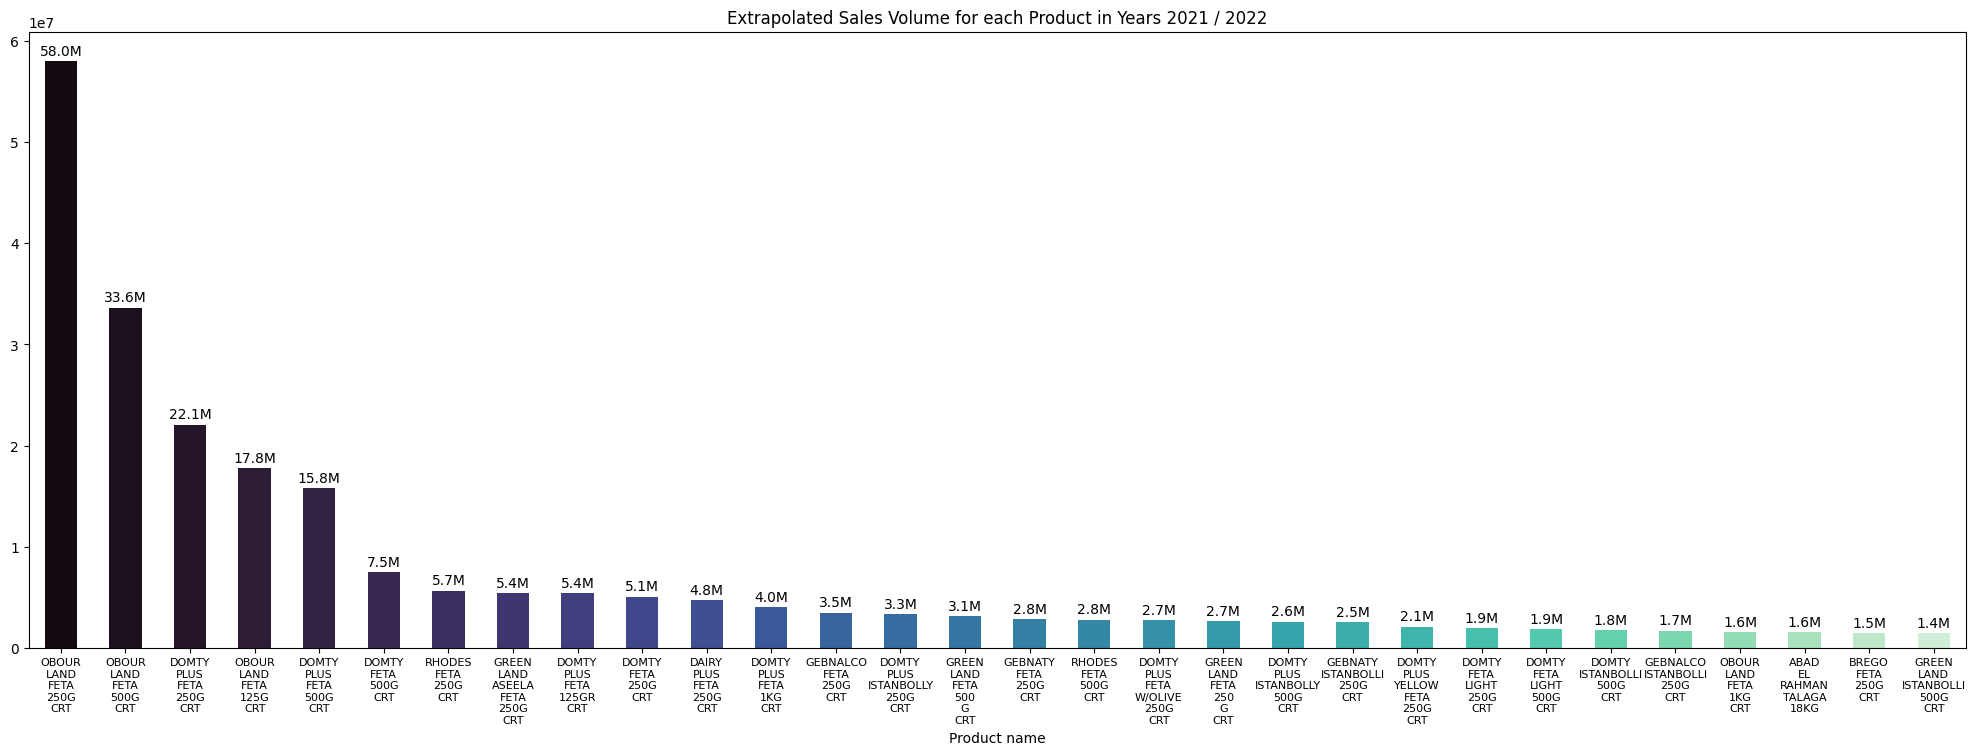

In [ ]:
top_30_labels = [format_label(label) for label in product_sales.index]

palette = sns.color_palette('mako', len(product_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Product in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data['Brand name'].nunique()

815

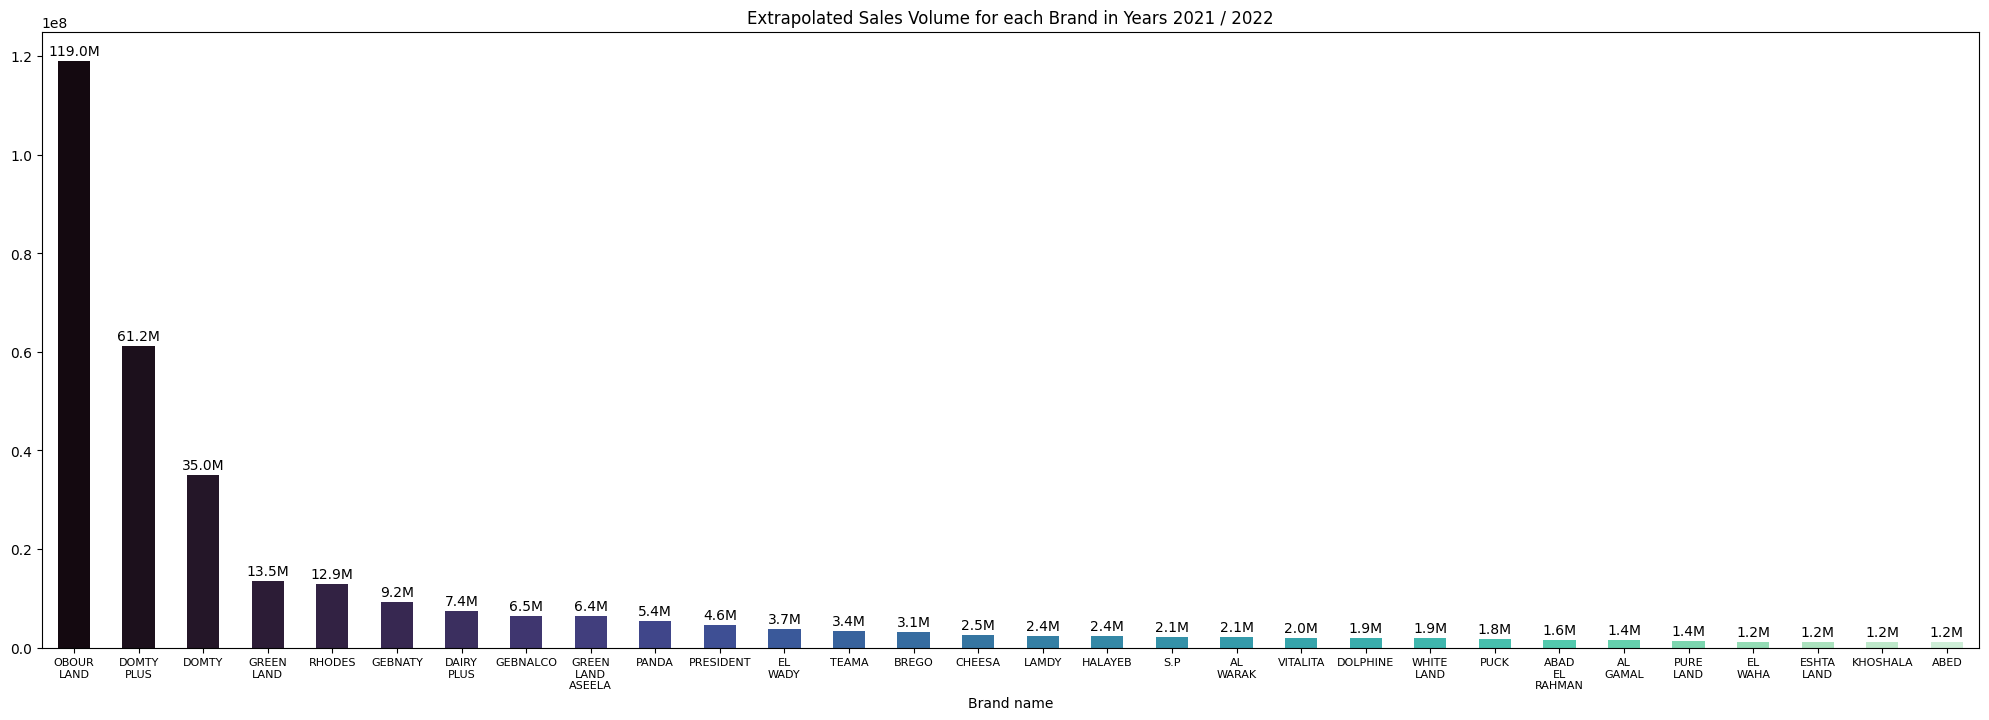

In [ ]:
brands_sales = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in brands_sales.index]

palette = sns.color_palette('mako', len(brands_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Brand in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data['Manufacturer name'].nunique()

712

In [ ]:
data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).index

Index(['OBOUR LAND CO', 'DOMTY - ARABIAN FOOD INDUSTRIES CO',
       'LACTALIS-HALAWA', 'THE ARAB DAIRY PRODUCTS CO.', 'NOT AVAILABLE',
       'AL BOROUJ CO', 'GREEN FIELD CO', 'DAIRY INTER.CO', 'RIYADA S.A.E.',
       'BREGO FOR FOOD INDUSTRIES ( S.A.E )', 'AM GROUP CO',
       'KHALED KHOSHALA CO', 'TAHTA FACTORY FOR CHEESE & BUTTER',
       'AL WARAK CO', 'HALAYEB CO', 'EGYPTION CO', 'FAFECO', 'ABAD CO',
       'EL FAYOUM CO.', 'ABD EL RAHEEM CO', 'ABED CO', 'MALEKA CO', 'TIBA CO',
       'AL FATH CO.', 'AWLAD NOUR CO', 'EL WAHA', 'SARA CO.', 'NADA CO',
       'MISR OCTOBER CO.', 'AL COMANDA CO'],
      dtype='object', name='Manufacturer name')

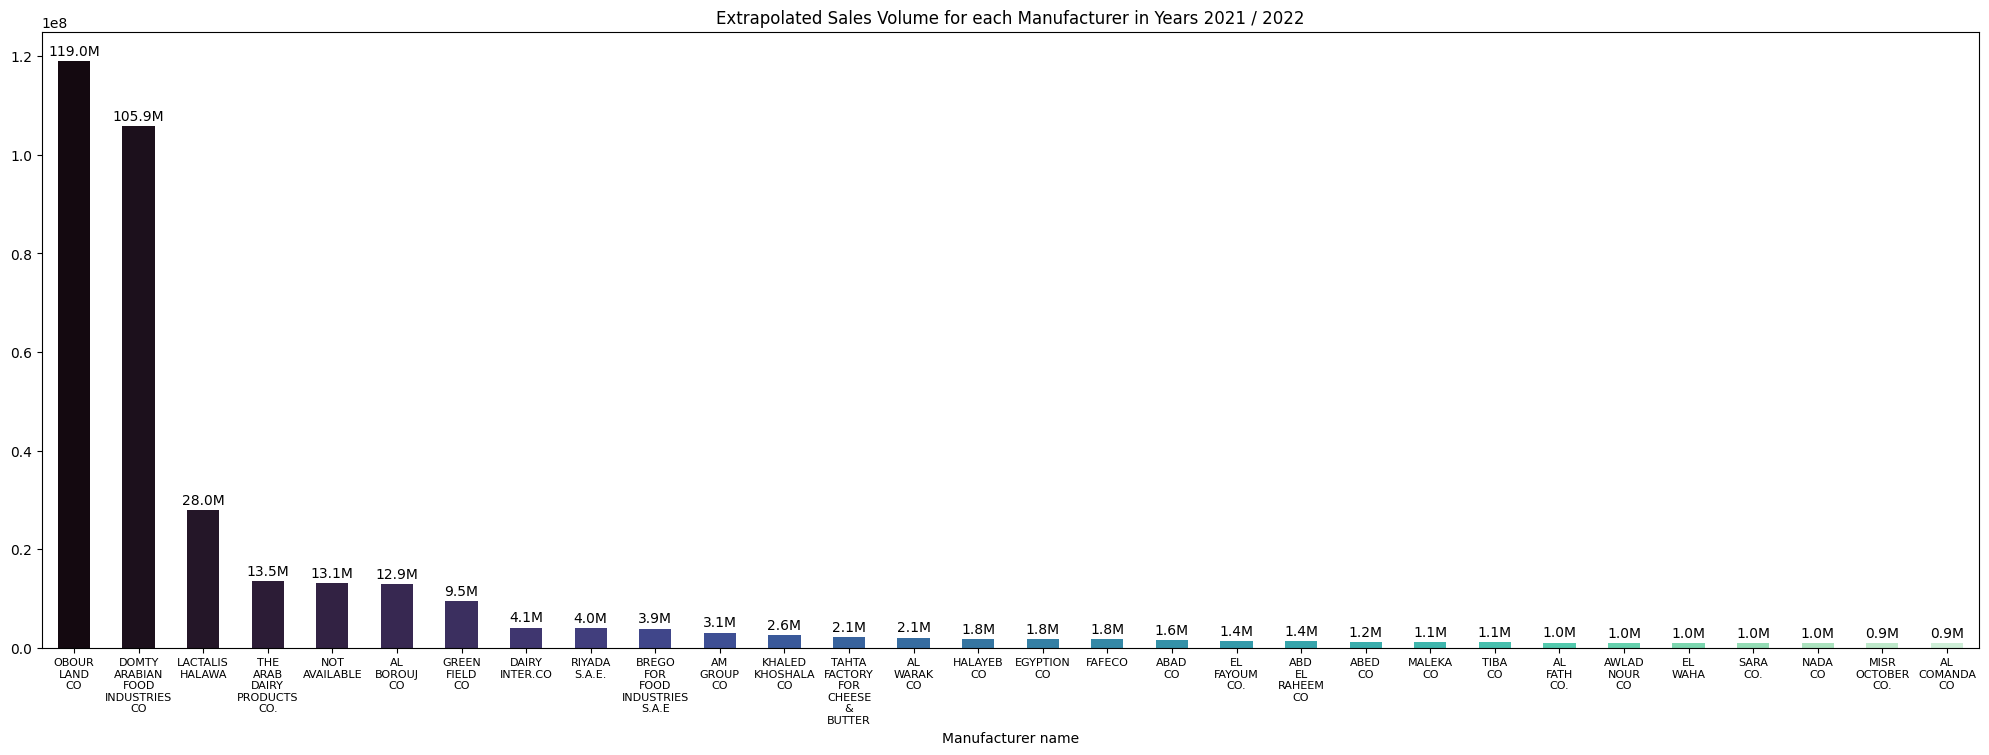

In [ ]:
manufacturer_sales = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in manufacturer_sales.index]

palette = sns.color_palette('mako', len(manufacturer_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Manufacturer in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data.head()

,Outlet mnemonic,Cell Name,Electronic,Region,Channel,Category name,Manufacturer name,Brand name,Product name,XFactor,Raw Sales Volume,Extrapolated Sales Volume,PeriodDate
0,ZD8020,CENTRAL UPPER EGYPT-R-LARGE GROCERY,False,UPPER EGYPT,Large Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,186.6969,13.7750,2571.749798,2020-01-01
1,ASQ005,FATHALLAH ASWAQ,True,ALEXANDRIA,Supermarket/Key Account,CHEESE- BLOCK,HALAYEB CO,HALAYEB,HALAYEB TALAGA 400G TUB,1.0000,2.6160,2.616000,2020-01-01
2,QNR089,SOUTHERN UE R SMALL GROCERY,False,UPPER EGYPT,Small Grocery,CHEESE- BLOCK,OBOUR LAND CO,OBOUR LAND,OBOUR LAND FETA 500G CRT,212.0554,2.9500,625.563430,2020-01-01
3,KHZ049,KHEIR ZAMAN,True,CAIRO,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 250G CRT,1.0000,3.8125,3.812500,2020-01-01
4,LX4700,South Upper Egypt Supermarket,False,UPPER EGYPT,Supermarket/Key Account,CHEESE- BLOCK,LACTALIS-HALAWA,PRESIDENT,PRESIDENT FETA 500G TUB,10.9699,2.0350,22.323747,2020-01-01


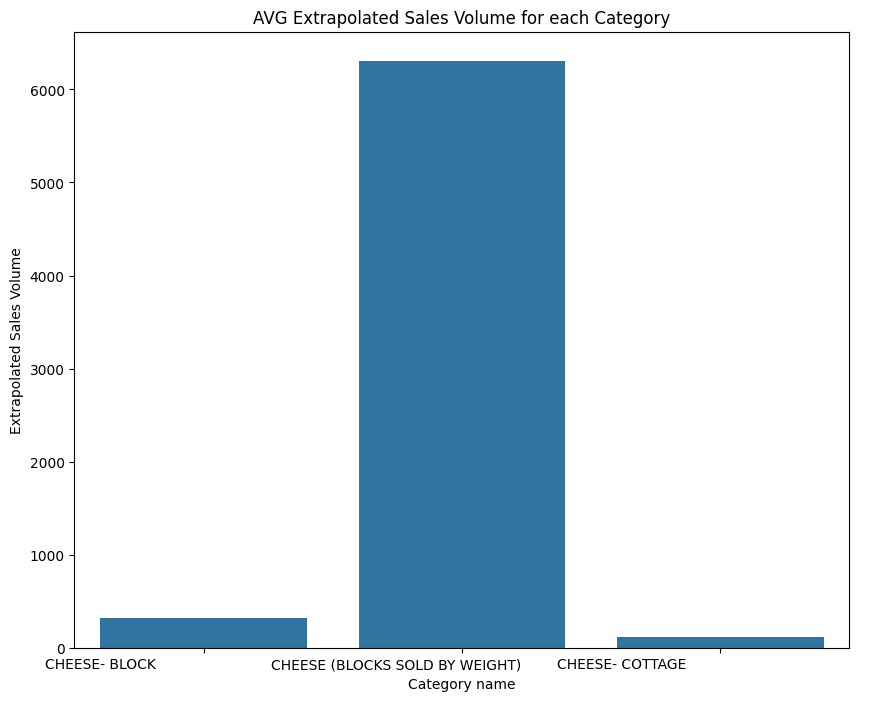

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Category name', y='Extrapolated Sales Volume', data=data, errorbar=None)
plt.title('AVG Extrapolated Sales Volume for each Category')
plt.show()

In [ ]:
data['Category name'].value_counts()

,count
Category name,
CHEESE- BLOCK,960832
CHEESE (BLOCKS SOLD BY WEIGHT),15413
CHEESE- COTTAGE,6928


In [ ]:
data['Outlet mnemonic'].unique()

array(['ZD8020', 'ASQ005', 'QNR089', ..., 'KFU056', 'C02974', 'KLU031'],
      dtype=object)

**Cell Name:** helps in organizing and analyzing retail data based on both location and store type.

In [ ]:
# data['Cell Name'].unique()

In [ ]:
data['Channel'].unique()

# Large Grocery: CENTRAL UPPER EGYPT-R-LARGE GROCERY
# Medium Grocery: EAST DELTA R MEDIUM GROCERY
# Small Grocery: SOUTHERN UE R SMALL GROCERY
# Supermarket: EAST DELTA-U-KA/SUPERMARKET
# Kiosk: WEST DELTA-U-KIOSKS
# Specialty Stores: HYPERONE, MERCATO, PANDA, FRESH FOOD

array(['Large Grocery', 'Supermarket/Key Account', 'Small Grocery',
       'Haberdashery/Kiosk/Mekla'], dtype=object)

In [ ]:
data['Region'].unique()

# "EAST DELTA," "WEST DELTA," "ALEXANDRIA," "CANAL ZONE," "SOUTHERN UPPER EGYPT," "CENTRAL UPPER EGYPT."

array(['UPPER EGYPT ', 'ALEXANDRIA', 'CAIRO ', 'DELTA ', 'CANAL ZONE '],
      dtype=object)